In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas import DataFrame
from time import localtime,strftime

In [2]:
df1 = pd.read_csv('department_data_hoho(cp949) (1).csv',encoding="cp949")
# department_data_hoho(cp949) (1).csv 파일을 cp949(글자읽어내는 것)로 읽어낸다.

In [3]:
df1['date_time'] = pd.to_datetime(df1['date_time'],format = '%Y-%m-%d %H:%M:%S',errors='raise')
# to_datetime : 문자열(object)타입을 datetime(일자시간) 타입으로 바꾼다.
# errors=raise : 날짜 포맷에 문제가 있을 때 예외발생

In [4]:
#df1['date_time']= df1['date_time'].astype('str')
# astype(dtype) : 모든 열의 데이터 타입을 dtype으로 변경 >> 여기서는 str(문자형태)로 변경

#df1['date_time']=pd.to_datetime(df1['date_time'])
# 문자타입을 시간타입으로 변경

df1['date'] = df1['date_time'].dt.strftime('%Y-%m-%d')
# 시간을 연,월,일 형태로 변경

In [5]:
#df1['new_time'] = df1['date'] = df1['date_time'].dt.strftime('%H:%M')
# 연,월,일, 시,분,초 형태에서 시간이랑 분만 가져오기 
df1['month'] = df1['date_time'].dt.month
# 월만 가져오기
df1['day'] = df1['date_time'].dt.day
# 일만 가져오기

df1

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,gender,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day
0,0,0,2000-06-25 12:12:00,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,1,...,1,108,서울,25.1,0.0,12:12,Sunday,2000-06-25,6,25
1,1,0,2000-06-25 12:42:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,1,108,서울,25.1,0.0,12:42,Sunday,2000-06-25,6,25
2,2,0,2000-08-26 18:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,1,108,서울,22.1,89.3,18:10,Saturday,2000-08-26,8,26
3,3,0,2000-08-26 18:30:00,본점,4.106430e+12,듀퐁,수입의류,명품토탈,잡화파트,1,...,1,108,서울,22.1,89.3,18:30,Saturday,2000-08-26,8,26
4,4,0,2000-09-03 18:02:00,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,0,...,1,108,서울,25.1,9.5,18:02,Sunday,2000-09-03,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,30359,2001-02-07 19:20:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,생식품,0,...,1,108,서울,-2.6,0.0,19:20,Wednesday,2001-02-07,2,7
1048571,1048571,30359,2001-03-07 15:53:00,신촌점,4.413860e+12,폴로보이즈,아동,아동,아동문화,0,...,1,108,서울,-1.6,0.0,15:53,Wednesday,2001-03-07,3,7
1048572,1048572,30360,2000-05-04 14:10:00,무역점,4.405620e+12,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,...,1,108,서울,18.0,0.0,14:10,Thursday,2000-05-04,5,4
1048573,1048573,30360,2000-05-04 14:42:00,무역점,4.406260e+12,엘르뿌뽕,신생아,아동,"아동,스포츠",0,...,1,108,서울,18.0,0.0,14:42,Thursday,2000-05-04,5,4


### 휴일 3일전

In [6]:
def before3_holiday(z):
    if z == '2000-05-02':
        return '5월 어린이날 3일전'
    elif z == '2000-05-05':
        return '5월 어버이날 3일전'
    elif z == '2000-05-08':
        return '5월 석가탄신일 3일전'
    elif z == '2000-06-03':
        return '6월 현충일 3일전'
    elif z == '2000-07-14':
        return '7월 제헌절 3일전'
    elif z == '2000-08-12':
        return '8월 광복절 3일전'
    elif z == '2000-09-08':
        return '9월 추석연휴(전날) 3일전'
    elif z == '2000-09-09':
        return '9월 추석 3일전'
    elif z == '2000-09-10':
        return '9월 추석연휴(다음날) 3일전'
    elif z == '2000-09-30':
        return '10월 개천절 3일전'
    elif z == '2000-12-22':
        return '12월 크리스마스 3일전'
    elif z == '2000-12-29':
        return '1월 신정 3일전'
    elif z == '2001-01-20':
        return '1월 설날연휴(전날) 3일전'
    elif z == '2001-01-21':
        return '1월 설날 3일전'
    elif z == '2001-01-22':
        return '1월 설날연휴(다음날) 3일전'
    elif z == '2001-02-26':
        return '3월 삼일절 3일전'
    elif z == '2001-04-02':
        return '4월 식목일 3일전'
    else :
        return ' '

In [7]:
df1['preparation3_holiday'] = df1.apply(lambda df1: before3_holiday(df1['date']),axis=1)
#df1['holiday'] = df1.apply(event_day(df1['month'],df1['day']),axis=1)
# df1

# index_holiday = df1[df1['holiday']==' '].index

# #df1의 index_14 삭제하기 >> df1_14에 저장
# holiday_drop= df1.drop(index_holiday)

# holiday_drop

# index_preholiday = df1[df1['preparation3_holiday']==' '].index

# #df1의 index_14 삭제하기 >> df1_14에 저장
# preholiday_drop= df1.drop(index_preholiday)

# preholiday_drop

In [8]:
df1['preparation3_holiday'] = df1.apply(lambda df1: before3_holiday(df1['date']),axis=1)
index_preholiday = df1[df1['preparation3_holiday']==' '].index
preholiday_drop= df1.drop(index_preholiday)
pre_holiday_group = preholiday_drop.groupby(preholiday_drop['preparation3_holiday']).sum()
sinchon_store = preholiday_drop[preholiday_drop['store']=='신촌점']
sinchon_store

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday
123,123,6,2000-08-12 18:42:00,신촌점,4.405550e+12,톰키드,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전
124,124,6,2000-08-12 18:42:00,신촌점,4.417730e+12,인터크루키즈,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전
125,125,6,2000-08-12 18:50:00,신촌점,4.417730e+12,인터크루키즈,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:50,Saturday,2000-08-12,8,12,8월 광복절 3일전
126,126,6,2000-08-12 19:22:00,신촌점,4.544940e+12,스누피인형,문화,문화,아동문화,0,...,108,서울,28.6,0.0,19:22,Saturday,2000-08-12,8,12,8월 광복절 3일전
155,155,7,2000-08-12 18:20:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,공산품,0,...,108,서울,28.6,0.0,18:20,Saturday,2000-08-12,8,12,8월 광복절 3일전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047919,1047919,30337,2000-07-14 11:20:00,신촌점,4.409270e+12,스포트리플레이,스포츠캐주얼,진캐주얼,영플라자,0,...,108,서울,26.6,0.0,11:20,Friday,2000-07-14,7,14,7월 제헌절 3일전
1047927,1047927,30337,2000-12-22 12:23:00,신촌점,4.125270e+12,슈프리미아,패션ACC,장신구,패션잡화,0,...,108,서울,5.4,0.0,12:23,Friday,2000-12-22,12,22,12월 크리스마스 3일전
1047928,1047928,30337,2000-12-22 12:53:00,신촌점,4.137680e+12,메이플,장신구,소품,영플라자,0,...,108,서울,5.4,0.0,12:53,Friday,2000-12-22,12,22,12월 크리스마스 3일전
1047964,1047964,30339,2000-06-03 16:10:00,신촌점,4.113610e+12,이태리,모자,섬유,패션잡화,0,...,108,서울,24.9,0.0,16:10,Saturday,2000-06-03,6,3,6월 현충일 3일전


In [9]:
pre_holiday_group

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
10월 개천절 3일전,2351538220,67549409,1.777358e+16,507,499101028,12875500,8581,1561,485892,90429.9,0.0,40491,134970
12월 크리스마스 3일전,1748239731,50213544,1.313302e+16,505,321735366,10873520,6250,1236,356184,17809.2,0.0,39576,72556
1월 설날 3일전,1693015822,48630540,1.225624e+16,377,348847851,9963070,5751,1241,349056,-4848.0,0.0,3232,67872
1월 설날연휴(다음날) 3일전,1659258569,47651555,1.180097e+16,397,275625648,7799070,5461,1080,348624,-4519.2,0.0,3228,71016
1월 설날연휴(전날) 3일전,1757353947,50489588,1.251407e+16,400,294179684,7834290,5922,1130,358668,1328.4,3985.2,3321,66420
1월 신정 3일전,1357131264,38988030,9.859792e+15,383,250530301,6656730,4573,1000,278100,-5665.0,0.0,30900,74675
3월 삼일절 3일전,1183256950,33989006,9.159840e+15,321,217871821,7903190,4365,866,252720,4446.0,0.0,4680,60840
4월 식목일 3일전,1134977762,32607300,8.334347e+15,283,222827888,7985700,4178,850,234684,15211.0,0.0,8692,4346
5월 석가탄신일 3일전,1471011110,42259384,1.107759e+16,433,234668956,9868450,5189,998,303156,47719.0,0.0,14035,22456


In [11]:
pre_holiday_group['amount'].sum()

5403322939

In [31]:
df1['preparation3_holiday'] = df1.apply(lambda df1: before3_holiday(df1['date']),axis=1)
index_preholiday = df1[df1['preparation3_holiday']==' '].index
preholiday_drop= df1.drop(index_preholiday)

In [12]:
pre_holiday_group1 = preholiday_drop.groupby(preholiday_drop['preparation3_holiday']).sum()
sinchon_store = preholiday_drop[preholiday_drop['store']=='본점']
sinchon_store

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday
8,8,0,2000-12-22 19:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,108,서울,5.4,0.0,19:10,Friday,2000-12-22,12,22,12월 크리스마스 3일전
9,9,0,2000-12-29 19:00:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,108,서울,-2.2,0.0,19:00,Friday,2000-12-29,12,29,1월 신정 3일전
89,89,5,2000-07-14 13:00:00,본점,4.217070e+12,강숙희,국내부띠끄,로얄부띠끄,로얄부띠끄,0,...,108,서울,26.6,0.0,13:00,Friday,2000-07-14,7,14,7월 제헌절 3일전
97,97,5,2000-09-09 18:40:00,본점,2.700000e+12,식품,용기보증,미확인pc,생식품파트,0,...,108,서울,20.2,0.3,18:40,Saturday,2000-09-09,9,9,9월 추석 3일전
120,120,6,2000-05-08 16:30:00,본점,4.120500e+12,겐조수입의류,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,108,서울,17.0,0.0,16:30,Monday,2000-05-08,5,8,5월 석가탄신일 3일전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048267,1048267,30348,2000-09-09 11:00:00,본점,4.417420e+12,GV2,진케주얼,진케주얼,"케주얼,구두,아동",0,...,108,서울,20.2,0.3,11:00,Saturday,2000-09-09,9,9,9월 추석 3일전
1048292,1048292,30348,2001-04-02 13:10:00,본점,4.400040e+12,모다까리나,아동,아동복,"케주얼,구두,아동",0,...,108,서울,7.0,0.0,13:10,Monday,2001-04-02,4,2,4월 식목일 3일전
1048293,1048293,30348,2001-04-02 13:20:00,본점,4.413860e+12,폴로보이즈,아동,아동복,"케주얼,구두,아동",0,...,108,서울,7.0,0.0,13:20,Monday,2001-04-02,4,2,4월 식목일 3일전
1048294,1048294,30348,2001-04-02 13:40:00,본점,4.415080e+12,나이키행사,스포츠웨어,스포츠,남성정장스포츠,0,...,108,서울,7.0,0.0,13:40,Monday,2001-04-02,4,2,4월 식목일 3일전


In [8]:
index_preholiday = df1[df1['preparation3_holiday']==' '].index
preholiday_drop= df1.drop(index_preholiday)
preholiday_drop

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday
8,8,0,2000-12-22 19:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,108,서울,5.4,0.0,19:10,Friday,2000-12-22,12,22,12월 크리스마스 3일전
9,9,0,2000-12-29 19:00:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,108,서울,-2.2,0.0,19:00,Friday,2000-12-29,12,29,1월 신정 3일전
89,89,5,2000-07-14 13:00:00,본점,4.217070e+12,강숙희,국내부띠끄,로얄부띠끄,로얄부띠끄,0,...,108,서울,26.6,0.0,13:00,Friday,2000-07-14,7,14,7월 제헌절 3일전
97,97,5,2000-09-09 18:40:00,본점,2.700000e+12,식품,용기보증,미확인pc,생식품파트,0,...,108,서울,20.2,0.3,18:40,Saturday,2000-09-09,9,9,9월 추석 3일전
120,120,6,2000-05-08 16:30:00,본점,4.120500e+12,겐조수입의류,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,108,서울,17.0,0.0,16:30,Monday,2000-05-08,5,8,5월 석가탄신일 3일전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048387,1048387,30350,2001-01-22 14:20:00,천호점,4.405880e+12,팬텀,골프(NB),골프,스포츠캐쥬얼,0,...,108,서울,-1.4,0.0,14:20,Monday,2001-01-22,1,22,1월 설날연휴(다음날) 3일전
1048388,1048388,30350,2001-01-22 15:33:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,108,서울,-1.4,0.0,15:33,Monday,2001-01-22,1,22,1월 설날연휴(다음날) 3일전
1048452,1048452,30353,2001-02-26 13:40:00,무역점,4.400560e+12,이동수,골프(국내),골프,골프/유니캐쥬얼,0,...,108,서울,1.9,0.0,13:40,Monday,2001-02-26,2,26,3월 삼일절 3일전
1048453,1048453,30353,2001-02-26 14:20:00,무역점,4.400560e+12,이동수,골프(국내),골프,골프/유니캐쥬얼,0,...,108,서울,1.9,0.0,14:20,Monday,2001-02-26,2,26,3월 삼일절 3일전


In [9]:
pre_holiday_group = preholiday_drop.groupby(preholiday_drop['preparation3_holiday']).sum()
pre_holiday_group

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
10월 개천절 3일전,2351538220,67549409,1.777358e+16,507,499101028,12875500,8581,1561,485892,90429.9,0.0,40491,134970
12월 크리스마스 3일전,1748239731,50213544,1.313302e+16,505,321735366,10873520,6250,1236,356184,17809.2,0.0,39576,72556
1월 설날 3일전,1693015822,48630540,1.225624e+16,377,348847851,9963070,5751,1241,349056,-4848.0,0.0,3232,67872
1월 설날연휴(다음날) 3일전,1659258569,47651555,1.180097e+16,397,275625648,7799070,5461,1080,348624,-4519.2,0.0,3228,71016
1월 설날연휴(전날) 3일전,1757353947,50489588,1.251407e+16,400,294179684,7834290,5922,1130,358668,1328.4,3985.2,3321,66420
1월 신정 3일전,1357131264,38988030,9.859792e+15,383,250530301,6656730,4573,1000,278100,-5665.0,0.0,30900,74675
3월 삼일절 3일전,1183256950,33989006,9.159840e+15,321,217871821,7903190,4365,866,252720,4446.0,0.0,4680,60840
4월 식목일 3일전,1134977762,32607300,8.334347e+15,283,222827888,7985700,4178,850,234684,15211.0,0.0,8692,4346
5월 석가탄신일 3일전,1471011110,42259384,1.107759e+16,433,234668956,9868450,5189,998,303156,47719.0,0.0,14035,22456


In [172]:
pre_holiday_group = preholiday_drop.groupby(holiday_drop['preparation3_holiday']).sum()
pre_holiday_group

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
5 pre_buddha_holiday,1471011110,42259384,1.107759e+16,433,234668956,9868450,5189,998,303156,47719.0,0.0,14035,22456
5 pre_parents_holiday,1792001572,51481082,1.395635e+16,484,355332666,14466590,6121,1218,366876,57409.3,6114.6,16985,16985


In [171]:
index_preholiday = df1[df1['preparation3_holiday']==' '].index

#df1의 index_14 삭제하기 >> df1_14에 저장
preholiday_drop= df1.drop(index_preholiday)

preholiday_drop

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day,holiday
8,8,0,2000-12-22 19:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,5.4,0.0,19:10,Friday,2000-12-22,12,22,12월 크리스마스 3일전,,
9,9,0,2000-12-29 19:00:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,-2.2,0.0,19:00,Friday,2000-12-29,12,29,1월 신정 3일전,,
89,89,5,2000-07-14 13:00:00,본점,4.217070e+12,강숙희,국내부띠끄,로얄부띠끄,로얄부띠끄,0,...,26.6,0.0,13:00,Friday,2000-07-14,7,14,7월 제헌절 3일전,7 Sliver Day,
97,97,5,2000-09-09 18:40:00,본점,2.700000e+12,식품,용기보증,미확인pc,생식품파트,0,...,20.2,0.3,18:40,Saturday,2000-09-09,9,9,9월 추석 3일전,,
120,120,6,2000-05-08 16:30:00,본점,4.120500e+12,겐조수입의류,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,17.0,0.0,16:30,Monday,2000-05-08,5,8,5월 석가탄신일 3일전,,5월 어버이날
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048387,1048387,30350,2001-01-22 14:20:00,천호점,4.405880e+12,팬텀,골프(NB),골프,스포츠캐쥬얼,0,...,-1.4,0.0,14:20,Monday,2001-01-22,1,22,1월 설날연휴(다음날) 3일전,,
1048388,1048388,30350,2001-01-22 15:33:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,-1.4,0.0,15:33,Monday,2001-01-22,1,22,1월 설날연휴(다음날) 3일전,,
1048452,1048452,30353,2001-02-26 13:40:00,무역점,4.400560e+12,이동수,골프(국내),골프,골프/유니캐쥬얼,0,...,1.9,0.0,13:40,Monday,2001-02-26,2,26,3월 삼일절 3일전,,
1048453,1048453,30353,2001-02-26 14:20:00,무역점,4.400560e+12,이동수,골프(국내),골프,골프/유니캐쥬얼,0,...,1.9,0.0,14:20,Monday,2001-02-26,2,26,3월 삼일절 3일전,,


In [166]:
d65 = sinchon_store[sinchon_store['preparation3_holiday']==' '].index
d65
#df1의 index_14 삭제하기 >> df1_14에 저장
sin_pre_ho= sinchon_store.drop(d65)
sinchon_store = df1[df1['store']=='신촌점']
sinchon_store
#sin_ho

sinchon_store_pre_holi = sin_pre_ho.groupby('preparation3_holiday').sum()
sinchon_store_pre_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
1 pre_eve_new_holiday,466499377,13402168,3.369801e+15,92,63441303,1822450,1611,273,95904,355.2,1065.6,888,17760
1 pre_happy_new_year_holiday,440972891,12665682,3.155234e+15,73,73224443,1931120,1550,264,90288,-1254.0,0.0,836,17556
1 pre_new_year_2_holiday,433156848,12433151,3.127341e+15,79,53129229,2059800,1523,219,91692,-1188.6,0.0,849,18678
1 pre_new_year_holiday,305357227,8769463,2.306001e+15,56,48152566,1472390,1078,165,65016,-1324.4,0.0,7224,17458
10 pre_national_foundation_holiday,635487324,18256965,4.865959e+15,110,90631556,2636580,2363,344,132192,24602.4,0.0,11016,36720
12 pre_christmas_holiday,435798604,12519809,3.214283e+15,101,69842893,2842330,1546,232,88344,4417.2,0.0,9816,17996
3 pre_independence_holiday,257474370,7394495,1.995266e+15,42,34021258,1195100,895,154,55512,976.6,0.0,1028,13364
4 pre_arbor_holiday,276302998,7944037,2.044076e+15,47,42306057,1411500,961,185,56700,3675.0,0.0,2100,1050
5 pre_buddha_holiday,392064816,11262274,2.851228e+15,80,47968553,2051420,1310,216,79596,12529.0,0.0,3685,5896


In [10]:
 sinchon_store = preholiday_drop[preholiday_drop['store']=='신촌점']
sinchon_store

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday
123,123,6,2000-08-12 18:42:00,신촌점,4.405550e+12,톰키드,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전
124,124,6,2000-08-12 18:42:00,신촌점,4.417730e+12,인터크루키즈,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전
125,125,6,2000-08-12 18:50:00,신촌점,4.417730e+12,인터크루키즈,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:50,Saturday,2000-08-12,8,12,8월 광복절 3일전
126,126,6,2000-08-12 19:22:00,신촌점,4.544940e+12,스누피인형,문화,문화,아동문화,0,...,108,서울,28.6,0.0,19:22,Saturday,2000-08-12,8,12,8월 광복절 3일전
155,155,7,2000-08-12 18:20:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,공산품,0,...,108,서울,28.6,0.0,18:20,Saturday,2000-08-12,8,12,8월 광복절 3일전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047919,1047919,30337,2000-07-14 11:20:00,신촌점,4.409270e+12,스포트리플레이,스포츠캐주얼,진캐주얼,영플라자,0,...,108,서울,26.6,0.0,11:20,Friday,2000-07-14,7,14,7월 제헌절 3일전
1047927,1047927,30337,2000-12-22 12:23:00,신촌점,4.125270e+12,슈프리미아,패션ACC,장신구,패션잡화,0,...,108,서울,5.4,0.0,12:23,Friday,2000-12-22,12,22,12월 크리스마스 3일전
1047928,1047928,30337,2000-12-22 12:53:00,신촌점,4.137680e+12,메이플,장신구,소품,영플라자,0,...,108,서울,5.4,0.0,12:53,Friday,2000-12-22,12,22,12월 크리스마스 3일전
1047964,1047964,30339,2000-06-03 16:10:00,신촌점,4.113610e+12,이태리,모자,섬유,패션잡화,0,...,108,서울,24.9,0.0,16:10,Saturday,2000-06-03,6,3,6월 현충일 3일전


In [12]:
df1['preparation3_holiday'] = df1.apply(lambda df1: before3_holiday(df1['date']),axis=1)
index_preholiday = df1[df1['preparation3_holiday']==' '].index
preholiday_drop= df1.drop(index_preholiday)
pre_holiday_group = preholiday_drop.groupby(preholiday_drop['preparation3_holiday']).sum()
sinchon_store = preholiday_drop[preholiday_drop['store']=='신촌점']
sinchon_store

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday
123,123,6,2000-08-12 18:42:00,신촌점,4.405550e+12,톰키드,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전
124,124,6,2000-08-12 18:42:00,신촌점,4.417730e+12,인터크루키즈,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전
125,125,6,2000-08-12 18:50:00,신촌점,4.417730e+12,인터크루키즈,아동,아동,아동문화,0,...,108,서울,28.6,0.0,18:50,Saturday,2000-08-12,8,12,8월 광복절 3일전
126,126,6,2000-08-12 19:22:00,신촌점,4.544940e+12,스누피인형,문화,문화,아동문화,0,...,108,서울,28.6,0.0,19:22,Saturday,2000-08-12,8,12,8월 광복절 3일전
155,155,7,2000-08-12 18:20:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,공산품,0,...,108,서울,28.6,0.0,18:20,Saturday,2000-08-12,8,12,8월 광복절 3일전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047919,1047919,30337,2000-07-14 11:20:00,신촌점,4.409270e+12,스포트리플레이,스포츠캐주얼,진캐주얼,영플라자,0,...,108,서울,26.6,0.0,11:20,Friday,2000-07-14,7,14,7월 제헌절 3일전
1047927,1047927,30337,2000-12-22 12:23:00,신촌점,4.125270e+12,슈프리미아,패션ACC,장신구,패션잡화,0,...,108,서울,5.4,0.0,12:23,Friday,2000-12-22,12,22,12월 크리스마스 3일전
1047928,1047928,30337,2000-12-22 12:53:00,신촌점,4.137680e+12,메이플,장신구,소품,영플라자,0,...,108,서울,5.4,0.0,12:53,Friday,2000-12-22,12,22,12월 크리스마스 3일전
1047964,1047964,30339,2000-06-03 16:10:00,신촌점,4.113610e+12,이태리,모자,섬유,패션잡화,0,...,108,서울,24.9,0.0,16:10,Saturday,2000-06-03,6,3,6월 현충일 3일전


In [11]:
sinchon_store_pre_holi = sinchon_store.groupby('preparation3_holiday').sum()
sinchon_store_pre_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
10월 개천절 3일전,635487324,18256965,4.865959e+15,110,90631556,2636580,2363,344,132192,24602.4,0.0,11016,36720
12월 크리스마스 3일전,435798604,12519809,3.214283e+15,101,69842893,2842330,1546,232,88344,4417.2,0.0,9816,17996
1월 설날 3일전,440972891,12665682,3.155234e+15,73,73224443,1931120,1550,264,90288,-1254.0,0.0,836,17556
1월 설날연휴(다음날) 3일전,433156848,12433151,3.127341e+15,79,53129229,2059800,1523,219,91692,-1188.6,0.0,849,18678
1월 설날연휴(전날) 3일전,466499377,13402168,3.369801e+15,92,63441303,1822450,1611,273,95904,355.2,1065.6,888,17760
1월 신정 3일전,305357227,8769463,2.306001e+15,56,48152566,1472390,1078,165,65016,-1324.4,0.0,7224,17458
3월 삼일절 3일전,257474370,7394495,1.995266e+15,42,34021258,1195100,895,154,55512,976.6,0.0,1028,13364
4월 식목일 3일전,276302998,7944037,2.044076e+15,47,42306057,1411500,961,185,56700,3675.0,0.0,2100,1050
5월 석가탄신일 3일전,392064816,11262274,2.851228e+15,80,47968553,2051420,1310,216,79596,12529.0,0.0,3685,5896


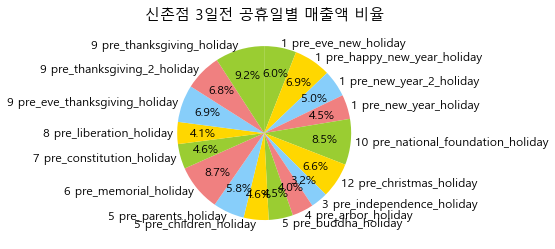

In [116]:

labels = sinchon_store_pre_holi.index
ratio = sinchon_store_pre_holi['amount']

plt.pie(sinchon_store_pre_holi['amount'],labels=sinchon_store_pre_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="신촌점 3일전 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [14]:
chun_store = df1[df1['store']=='천호점']
d0202 = chun_store[chun_store['preparation3_holiday']==' '].index

#df1의 index_14 삭제하기 >> df1_14에 저장
chun_pre_ho= chun_store.drop(d0202)

#sin_ho

chun_store_pre_holi = chun_pre_ho.groupby('preparation3_holiday').sum()
chun_store_pre_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
10월 개천절 3일전,414315555,11891687,3.428658e+15,61,74707176,1754010,1723,286,92664,17245.8,0.0,7722,25740
12월 크리스마스 3일전,302564712,8689514,2.400605e+15,69,52624194,1683390,1228,199,63396,3169.8,0.0,7044,12914
1월 설날 3일전,330560435,9496746,2.469004e+15,73,66767135,1835290,1205,205,69012,-958.5,0.0,639,13419
1월 설날연휴(다음날) 3일전,333328170,9573297,2.349222e+15,75,48261663,1011400,1095,218,69660,-903.0,0.0,645,14190
1월 설날연휴(전날) 3일전,395165738,11353598,2.856467e+15,55,62502887,1451790,1403,230,79380,294.0,882.0,735,14700
1월 신정 3일전,250073679,7180158,1.902162e+15,52,40374689,1280000,906,170,52596,-1071.4,0.0,5844,14123
3월 삼일절 3일전,213218328,6127374,1.718346e+15,48,35019517,1422080,846,131,46872,824.6,0.0,868,11284
4월 식목일 3일전,228638261,6568808,1.623493e+15,56,34495762,1065430,893,145,46980,3045.0,0.0,1740,870
5월 석가탄신일 3일전,281350606,8084821,2.157620e+15,52,38396047,1580970,1055,174,56700,8925.0,0.0,2625,4200


In [15]:
chun_store_pre_holi['amount'].sum()

875267720

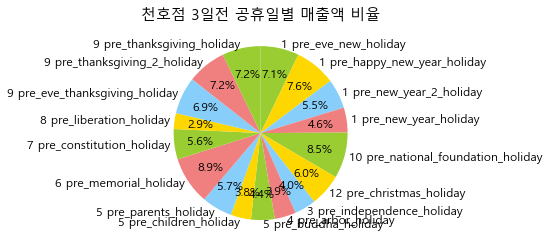

In [134]:
labels = chun_store_pre_holi.index
ratio = chun_store_pre_holi['amount']

plt.pie(chun_store_pre_holi['amount'],labels=chun_store_pre_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="천호점 3일전 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [21]:
mu_store = df1[df1['store']=='무역점']
d66666 = mu_store[mu_store['preparation3_holiday']==' '].index

#df1의 index_14 삭제하기 >> df1_14에 저장
mu_pre_ho= mu_store.drop(d66666)

#sin_ho

mu_store_pre_holi = mu_pre_ho.groupby('preparation3_holiday').sum()
mu_store_pre_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
10월 개천절 3일전,638646962,18351962,4.680534e+15,144,139019717,4528840,2248,412,128304,23878.8,0.0,10692,35640
12월 크리스마스 3일전,456162048,13099292,3.493013e+15,120,83225253,2755650,1640,300,94392,4719.6,0.0,10488,19228
1월 설날 3일전,457826073,13151209,3.327496e+15,90,99365404,2580960,1560,365,94500,-1312.5,0.0,875,18375
1월 설날연휴(다음날) 3일전,431700609,12404685,3.037357e+15,100,81017681,2480710,1389,268,89316,-1157.8,0.0,827,18194
1월 설날연휴(전날) 3일전,467171489,13427723,3.145203e+15,99,76759791,2431960,1412,267,90936,336.8,1010.4,842,16840
1월 신정 3일전,394478943,11334919,2.844779e+15,124,84346834,2231440,1336,301,80460,-1639.0,0.0,8940,21605
3월 삼일절 3일전,331660687,9528884,2.542773e+15,81,59359284,2166290,1215,257,69984,1231.2,0.0,1296,16848
4월 식목일 3일전,263213665,7558202,2.019006e+15,62,57238059,2135430,1017,202,57240,3710.0,0.0,2120,1060
5월 석가탄신일 3일전,391557833,11250015,3.029689e+15,110,60874963,2590130,1388,284,82836,13039.0,0.0,3835,6136


In [22]:
mu_store_pre_holi['amount'].sum()

1520575193

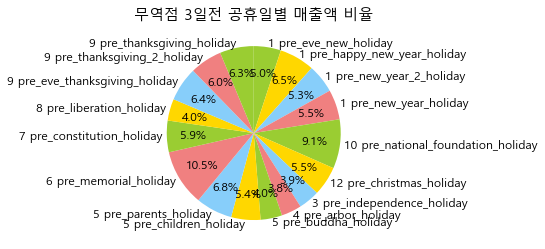

In [136]:
labels = mu_store_pre_holi.index
ratio = mu_store_pre_holi['amount']

plt.pie(mu_store_pre_holi['amount'],labels=mu_store_pre_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="무역점 3일전 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [ ]:
holiday_group = holiday_drop.groupby(holiday_drop['holiday']).sum()
holiday_group

In [23]:
origi_store = df1[df1['store']=='본점']
d999 = origi_store[origi_store['preparation3_holiday']==' '].index
d999
#df1의 index_14 삭제하기 >> df1_14에 저장
origi_pre_ho= origi_store.drop(d999)

#sin_ho

origi_store_pre_holi = origi_pre_ho.groupby('preparation3_holiday').sum()
origi_store_pre_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
10월 개천절 3일전,663088379,19048795,4.798431e+15,192,194742579,3956070,2247,519,132732,24702.9,0.0,11061,36870
12월 크리스마스 3일전,553714367,15904929,4.025121e+15,215,116043026,3592150,1836,505,110052,5502.6,0.0,12228,22418
1월 설날 3일전,463656423,13316903,3.304508e+15,141,109490869,3615700,1436,407,95256,-1323.0,0.0,882,18522
1월 설날연휴(다음날) 3일전,461072942,13240422,3.287047e+15,143,93217075,2247160,1454,375,97956,-1269.8,0.0,907,19954
1월 설날연휴(전날) 3일전,428517343,12306099,3.142595e+15,154,91475703,2128090,1496,360,92448,342.4,1027.2,856,17120
1월 신정 3일전,407221415,11703490,2.806850e+15,151,77656212,1672900,1253,364,80028,-1630.2,0.0,8892,21489
3월 삼일절 3일전,380903565,10938253,2.903455e+15,150,89471762,3119720,1409,324,80352,1413.6,0.0,1488,19344
4월 식목일 3일전,366822838,10536253,2.647773e+15,118,88788010,3373340,1307,318,73764,4781.0,0.0,2732,1366
5월 석가탄신일 3일전,406037855,11662274,3.039058e+15,191,87429393,3645930,1436,324,84024,13226.0,0.0,3890,6224


In [24]:
origi_store_pre_holi['amount'].sum()

1944444995

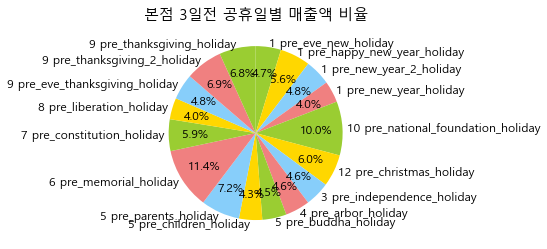

In [126]:
labels = origi_store_pre_holi.index
ratio = origi_store_pre_holi['amount']

plt.pie(origi_store_pre_holi['amount'],labels=origi_store_pre_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="본점 3일전 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [8]:
pre_holi_index = df1[df1['preparation3_holiday']==' '].index
pre_holi_index
#df1의 index_14 삭제하기 >> df1_14에 저장
df1_pre_holi= df1.drop(pre_holi_index)
df1_pre_holi

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday
8,8,0,2000-12-22 19:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,108,서울,5.4,0.0,19:10,Friday,2000-12-22,12,22,12 pre_christmas_holiday
9,9,0,2000-12-29 19:00:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,108,서울,-2.2,0.0,19:00,Friday,2000-12-29,12,29,1 pre_new_year_holiday
89,89,5,2000-07-14 13:00:00,본점,4.217070e+12,강숙희,국내부띠끄,로얄부띠끄,로얄부띠끄,0,...,108,서울,26.6,0.0,13:00,Friday,2000-07-14,7,14,7 pre_constitution_holiday
97,97,5,2000-09-09 18:40:00,본점,2.700000e+12,식품,용기보증,미확인pc,생식품파트,0,...,108,서울,20.2,0.3,18:40,Saturday,2000-09-09,9,9,9 pre_thanksgiving_holiday
120,120,6,2000-05-08 16:30:00,본점,4.120500e+12,겐조수입의류,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,108,서울,17.0,0.0,16:30,Monday,2000-05-08,5,8,5 pre_buddha_holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048387,1048387,30350,2001-01-22 14:20:00,천호점,4.405880e+12,팬텀,골프(NB),골프,스포츠캐쥬얼,0,...,108,서울,-1.4,0.0,14:20,Monday,2001-01-22,1,22,1 pre_new_year_2_holiday
1048388,1048388,30350,2001-01-22 15:33:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,108,서울,-1.4,0.0,15:33,Monday,2001-01-22,1,22,1 pre_new_year_2_holiday
1048452,1048452,30353,2001-02-26 13:40:00,무역점,4.400560e+12,이동수,골프(국내),골프,골프/유니캐쥬얼,0,...,108,서울,1.9,0.0,13:40,Monday,2001-02-26,2,26,3 pre_independence_holiday
1048453,1048453,30353,2001-02-26 14:20:00,무역점,4.400560e+12,이동수,골프(국내),골프,골프/유니캐쥬얼,0,...,108,서울,1.9,0.0,14:20,Monday,2001-02-26,2,26,3 pre_independence_holiday


In [10]:
pre3 = df1_pre_holi.groupby(df1_pre_holi['preparation3_holiday']).sum()
pre3

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
preparation3_holiday,,,,,,,,,,,,,
1 pre_eve_new_holiday,1757353947,50489588,1.251407e+16,400,294179684,7834290,5922,1130,358668,1328.4,3985.2,3321,66420
1 pre_happy_new_year_holiday,1693015822,48630540,1.225624e+16,377,348847851,9963070,5751,1241,349056,-4848.0,0.0,3232,67872
1 pre_new_year_2_holiday,1659258569,47651555,1.180097e+16,397,275625648,7799070,5461,1080,348624,-4519.2,0.0,3228,71016
1 pre_new_year_holiday,1357131264,38988030,9.859792e+15,383,250530301,6656730,4573,1000,278100,-5665.0,0.0,30900,74675
10 pre_national_foundation_holiday,2351538220,67549409,1.777358e+16,507,499101028,12875500,8581,1561,485892,90429.9,0.0,40491,134970
12 pre_christmas_holiday,1748239731,50213544,1.313302e+16,505,321735366,10873520,6250,1236,356184,17809.2,0.0,39576,72556
3 pre_independence_holiday,1183256950,33989006,9.159840e+15,321,217871821,7903190,4365,866,252720,4446.0,0.0,4680,60840
4 pre_arbor_holiday,1134977762,32607300,8.334347e+15,283,222827888,7985700,4178,850,234684,15211.0,0.0,8692,4346
5 pre_buddha_holiday,1471011110,42259384,1.107759e+16,433,234668956,9868450,5189,998,303156,47719.0,0.0,14035,22456


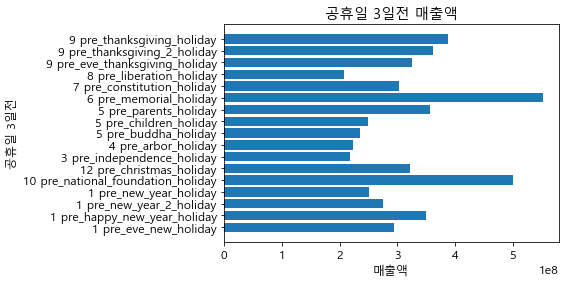

In [11]:
x = pre3['amount']
y = pre3.index
plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.barh(y,x)
# plt.xticks(x) #띄움
plt.xlabel("매출액")
plt.ylabel("공휴일 3일전")
plt.title("공휴일 3일전 매출액")

plt.show()

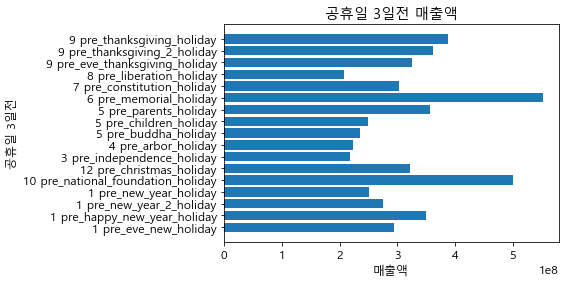

In [12]:
x = pre3['amount']
y = pre3.index
plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.barh(y,x)
# plt.xticks(x) #띄움
plt.xlabel("매출액")
plt.ylabel("공휴일 3일전")
plt.title("공휴일 3일전 매출액")

plt.show()

labels = mu_store_holi.index
ratio = mu_store_holi['amount']

plt.pie(mu_store_holi['amount'],labels=mu_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="무역점 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [13]:
# 1-12월 ~day 함수 만들기
def event_day(y,x):
#     if x == 14 and y == 1 :
#         return 'Diary Day'
#     else :
#         return ' '
#     for i in range(1,13):
#         a = ['month']==i
#         print(a)
    if y == 1 and x == 14:
        return '1 Diary Day'
    elif y ==2 and x==14:
        return '2 Valentine Day'
    elif y ==3 and x==14:
        return '3 White Day'
    elif y ==4 and x==14:
        return '4 Black Day'
    elif y==5 and x==14:
        return '5 Rose Day'
    elif y==6 and x==14:
        return '6 Kiss Day'
    elif y==7 and x==14:
        return '7 Sliver Day'
    elif y==8 and x==14:
        return '8 Green Day'
    elif y==9 and x==14:
        return '9 Photo Day'
    elif y==10 and x==14:
        return '10 Wine Day'
    elif y==11 and x==11:
        return '11 Ppapparo Day'
    elif y==11 and x==14:
        return '11 Movie Day'
    elif y==12 and x==14:
        return '12 Hug Day'
    else :
        return ' '

In [14]:
# holiday라는 컬럼 만들기 >> lambda함수를 이용해서
# df1에 람다식 붙이기
# event_day(y,x)값 집어넣는 함수인데 df1['month'] = y, df1['day'] =x 가 된다. 
#
df1['fourteenth_day'] = df1.apply(lambda df1: event_day(df1['month'],df1['day']),axis=1)
#df1['holiday'] = df1.apply(event_day(df1['month'],df1['day']),axis=1)
df1

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
0,0,0,2000-06-25 12:12:00,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:12,Sunday,2000-06-25,6,25,,
1,1,0,2000-06-25 12:42:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:42,Sunday,2000-06-25,6,25,,
2,2,0,2000-08-26 18:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,22.1,89.3,18:10,Saturday,2000-08-26,8,26,,
3,3,0,2000-08-26 18:30:00,본점,4.106430e+12,듀퐁,수입의류,명품토탈,잡화파트,1,...,서울,22.1,89.3,18:30,Saturday,2000-08-26,8,26,,
4,4,0,2000-09-03 18:02:00,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,0,...,서울,25.1,9.5,18:02,Sunday,2000-09-03,9,3,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,30359,2001-02-07 19:20:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,생식품,0,...,서울,-2.6,0.0,19:20,Wednesday,2001-02-07,2,7,,
1048571,1048571,30359,2001-03-07 15:53:00,신촌점,4.413860e+12,폴로보이즈,아동,아동,아동문화,0,...,서울,-1.6,0.0,15:53,Wednesday,2001-03-07,3,7,,
1048572,1048572,30360,2000-05-04 14:10:00,무역점,4.405620e+12,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,...,서울,18.0,0.0,14:10,Thursday,2000-05-04,5,4,,
1048573,1048573,30360,2000-05-04 14:42:00,무역점,4.406260e+12,엘르뿌뽕,신생아,아동,"아동,스포츠",0,...,서울,18.0,0.0,14:42,Thursday,2000-05-04,5,4,,


In [15]:
#df1['holiday'] = df1['day'].apply(event_day)

# df1의 fourteen 컬럼이 빈값인 df1의 인덱스
index_14 = df1[df1['fourteenth_day']==' '].index

#df1의 index_14 삭제하기 >> df1_14에 저장
df1_14= df1.drop(index_14)

df1_14

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
15,15,1,2000-05-14 10:40:00,본점,4.120500e+12,겐조수입의류,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,서울,18.5,0.0,10:40,Sunday,2000-05-14,5,14,,5 Rose Day
89,89,5,2000-07-14 13:00:00,본점,4.217070e+12,강숙희,국내부띠끄,로얄부띠끄,로얄부띠끄,0,...,서울,26.6,0.0,13:00,Friday,2000-07-14,7,14,7 pre_constitution_holiday,7 Sliver Day
133,133,6,2000-11-11 12:10:00,본점,4.124180e+12,시세이도,수입종합화장품,화장품,잡화파트,1,...,서울,1.9,0.0,12:10,Saturday,2000-11-11,11,11,,11 Ppapparo Day
134,134,6,2000-11-11 12:20:00,본점,4.140650e+12,태현닥스외양말,양말,섬유잡화,잡화파트,0,...,서울,1.9,0.0,12:20,Saturday,2000-11-11,11,11,,11 Ppapparo Day
135,135,6,2000-11-11 12:40:00,본점,4.220240e+12,ELLE,내의,내의란제리,"케주얼,구두,아동",0,...,서울,1.9,0.0,12:40,Saturday,2000-11-11,11,11,,11 Ppapparo Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048514,1048514,30356,2000-08-14 16:23:00,천호점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화,1,...,서울,28.1,0.0,16:23,Monday,2000-08-14,8,14,,8 Green Day
1048515,1048515,30356,2000-08-14 16:43:00,천호점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화,1,...,서울,28.1,0.0,16:43,Monday,2000-08-14,8,14,,8 Green Day
1048516,1048516,30356,2000-08-14 16:50:00,천호점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화,1,...,서울,28.1,0.0,16:50,Monday,2000-08-14,8,14,,8 Green Day
1048517,1048517,30356,2000-08-14 17:03:00,천호점,4.405620e+12,지오다노,영캐쥬얼,영트랜디,영라이브,0,...,서울,28.1,0.0,17:03,Monday,2000-08-14,8,14,,8 Green Day


In [16]:
# df1_14의 fourteen 컬럼으로 그룹화를 하면서 month 값으로 묶음?
#fourteenth_day_sum = df1_14.groupby(df1_14['fourteenth_day'])['month'].sum()

# 14day 그룹화하기( df1_14의 fourteen_day를 기준으로 각 컬럼들 합계 보여주기)
fourteenth_day_group = df1_14.groupby(df1_14['fourteenth_day']).sum()

In [17]:
fourteenth_day_group

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
fourteenth_day,,,,,,,,,,,,,
1 Diary Day,2931912678,84219874,2.207764e+16,727,706903099,15131050,11201,2073,608148,-86154.3,0.0,5631,78834
10 Wine Day,2709685858,77828077,2.091470e+16,678,572133377,20227200,10192,1785,568080,61016.0,0.0,52600,73640
11 Movie Day,1343629701,38599382,9.840058e+15,291,222042551,8676780,4549,909,276372,22519.2,0.0,28149,35826
11 Ppapparo Day,2198812732,63181033,1.671657e+16,614,554298447,23722160,8546,1468,449820,7913.5,0.0,45815,45815
12 Hug Day,1164514943,33452614,8.276937e+15,262,203265421,7837070,3822,773,235440,7630.0,1526.0,26160,30520
2 Valentine Day,1605747000,46118800,1.151457e+16,475,251964740,9457270,5434,1001,327240,-10908.0,0.0,6060,42420
3 White Day,1262421977,36271104,9.086946e+15,297,239729764,9512410,4157,807,256068,18968.0,2371.0,7113,33194
4 Black Day,3631241053,104305707,2.701073e+16,921,657196216,18602470,13334,2227,742068,62526.1,29545.3,27484,96194
5 Rose Day,2167678918,62281758,1.627011e+16,692,374657290,15730050,7405,1570,437940,75017.5,0.0,20275,56770


In [18]:
fourteenth_day_group.index

Index(['1 Diary Day', '10 Wine Day', '11 Movie Day', '11 Ppapparo Day',
       '12 Hug Day', '2 Valentine Day', '3 White Day', '4 Black Day',
       '5 Rose Day', '6 Kiss Day', '7 Sliver Day', '8 Green Day'],
      dtype='object', name='fourteenth_day')

In [19]:

# fourteen_day_sum 에서 amount 컬럼 가져오기 (판매금액만 보고 싶은 것)
fourteenth_day_amount=fourteenth_day_group['amount']

### 14day's 매출액

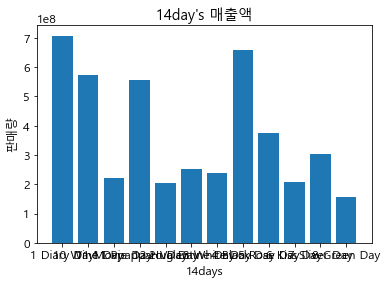

In [20]:
x = fourteenth_day_group.index
y = fourteenth_day_amount
plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.bar(x,y)
plt.xticks(x) #띄움
plt.xlabel("14days")
plt.ylabel("판매량")
plt.title("14day's 매출액")

plt.show()

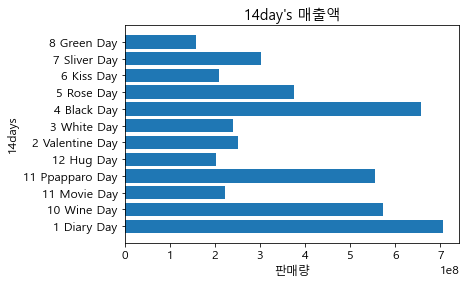

In [21]:

plt.barh(x,y)
plt.ylabel("14days")
plt.xlabel("판매량")
plt.title("14day's 매출액")
plt.show()

### 14day's 매출액 비율

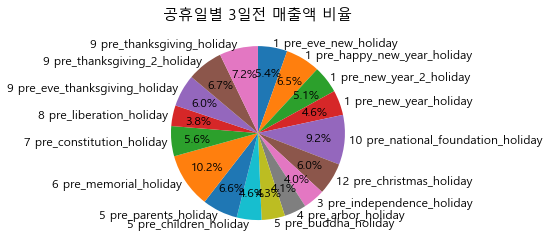

In [22]:
labels = pre3.index
ratio = pre3['amount']

plt.pie(pre3['amount'],labels=pre3.index,autopct='%.1f%%',
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="공휴일별 3일전 매출액 비율"
plt.title(title, size=15)
plt.show()

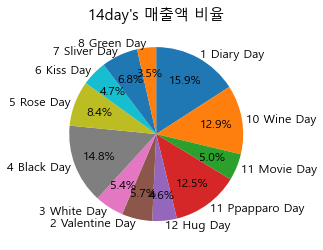

In [23]:
labels = fourteenth_day_group.index
ratio = fourteenth_day_group['amount']

plt.pie(fourteenth_day_group['amount'],labels=fourteenth_day_group.index,autopct='%.1f%%',
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="14day's 매출액 비율"
plt.title(title, size=15)
plt.show()

In [24]:
# df1에서 brand를 기준으로 그룹화하여 총합계를 각각 보여주기
df1.groupby('brand').sum()

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
brand,,,,,,,,,,,,,
012베네통,1327075930,38121145,1.144135e+16,2170,158835170,5383360,4589,1230,279936,33626.0,9499.5,17346,37552
1492,426996464,12271263,3.278624e+15,0,44202200,2366450,1373,208,84132,10183.1,3841.1,5220,11939
1492마일즈,675367823,19409444,5.404416e+15,0,69660700,3679400,2131,472,132408,15208.6,2899.7,7181,17996
3N,11209230,322015,9.108704e+13,0,815000,0,36,6,2376,524.6,173.7,170,312
96NY,1159185083,33299528,9.286892e+15,0,270971690,11938030,5731,599,238140,32715.4,6280.6,14334,32401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
휠라행사,19564316,561689,1.499016e+14,0,933600,0,50,9,3672,493.4,0.0,136,867
휴고보스,218002314,6262469,2.653599e+15,420,180333000,0,1152,251,45360,5158.4,1331.4,2891,5751
휴먼앤휴먼,6352469,182796,4.746390e+13,0,596200,0,25,7,1188,263.1,22.0,71,196


In [25]:
df1_food_drop = df1[df1['brand']=='식품'].index
#df1의 index_14 삭제하기 >> df1_14에 저장
df1_food_drop1 = df1.drop(df1_food_drop)
df1_food_drop1

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
0,0,0,2000-06-25 12:12:00,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:12,Sunday,2000-06-25,6,25,,
1,1,0,2000-06-25 12:42:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:42,Sunday,2000-06-25,6,25,,
2,2,0,2000-08-26 18:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,22.1,89.3,18:10,Saturday,2000-08-26,8,26,,
3,3,0,2000-08-26 18:30:00,본점,4.106430e+12,듀퐁,수입의류,명품토탈,잡화파트,1,...,서울,22.1,89.3,18:30,Saturday,2000-08-26,8,26,,
4,4,0,2000-09-03 18:02:00,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,0,...,서울,25.1,9.5,18:02,Sunday,2000-09-03,9,3,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,1048569,30359,2001-02-07 19:13:00,신촌점,2.139140e+12,랑콤,수입종합화장품,화장품,패션잡화,0,...,서울,-2.6,0.0,19:13,Wednesday,2001-02-07,2,7,,
1048571,1048571,30359,2001-03-07 15:53:00,신촌점,4.413860e+12,폴로보이즈,아동,아동,아동문화,0,...,서울,-1.6,0.0,15:53,Wednesday,2001-03-07,3,7,,
1048572,1048572,30360,2000-05-04 14:10:00,무역점,4.405620e+12,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,...,서울,18.0,0.0,14:10,Thursday,2000-05-04,5,4,,
1048573,1048573,30360,2000-05-04 14:42:00,무역점,4.406260e+12,엘르뿌뽕,신생아,아동,"아동,스포츠",0,...,서울,18.0,0.0,14:42,Thursday,2000-05-04,5,4,,


In [26]:
# brand로 그룹화하고 amount컬럼의 합계 중 상위 10개만 보여주기
a = df1_food_drop1.groupby('brand')['amount'].sum().nlargest(10)
a

brand
시슬리          1394914120
에스티로더        1213414000
폴로           1187646200
랑콤           1017401620
타임            813544000
버버리           812304000
지오다노          756260000
아모레           736234800
샤넬            724163020
크리스챤디올화장품     682647000
Name: amount, dtype: int64

### 브랜드 상위 10 판매량


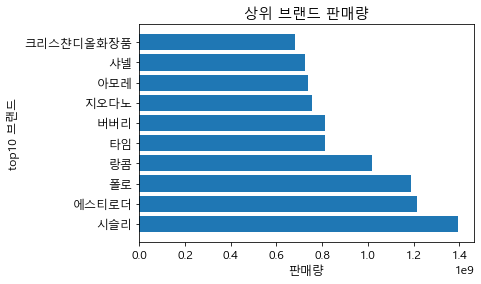

In [27]:
x = a.index
y = a[:]
plt.barh(x,y)
plt.ylabel("top10 브랜드")
plt.xlabel("판매량")
plt.title("상위 브랜드 판매량")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [28]:
dior = df1[df1['brand']=='크리스챤디올화장품']
dior

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
627,627,17,2000-07-21 17:50:00,본점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화파트,1,...,서울,27.5,0.0,17:50,Friday,2000-07-21,7,21,,
1013,1013,23,2001-02-27 15:32:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,서울,3.0,7.7,15:32,Tuesday,2001-02-27,2,27,,
1055,1055,25,2000-08-13 15:50:00,본점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화파트,1,...,서울,28.9,0.0,15:50,Sunday,2000-08-13,8,13,,
1056,1056,25,2000-10-07 15:03:00,신촌점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,패션잡화,1,...,서울,20.2,0.0,15:03,Saturday,2000-10-07,10,7,,
1065,1065,25,2001-04-05 15:00:00,본점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화파트,1,...,서울,9.4,0.0,15:00,Thursday,2001-04-05,4,5,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048388,1048388,30350,2001-01-22 15:33:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,서울,-1.4,0.0,15:33,Monday,2001-01-22,1,22,1 pre_new_year_2_holiday,
1048391,1048391,30350,2001-02-02 16:23:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,서울,-4.9,0.1,16:23,Friday,2001-02-02,2,2,,
1048403,1048403,30350,2001-04-08 17:13:00,천호점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,잡화,1,...,서울,16.3,0.0,17:13,Sunday,2001-04-08,4,8,,
1048437,1048437,30352,2000-08-01 18:53:00,신촌점,4.109160e+12,크리스챤디올화장품,수입종합화장품,화장품,패션잡화,1,...,서울,26.3,0.0,18:53,Tuesday,2000-08-01,8,1,,


In [29]:
dior['amount']

627         99000
1013        40000
1055        50000
1056       106000
1065        42000
            ...  
1048388     55000
1048391     63000
1048403     57000
1048437     44000
1048460     33000
Name: amount, Length: 8894, dtype: int64

In [30]:
b = dior.groupby('month').sum()
b

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,345359401,9919146,2.822993e+15,687,58998000,3339250,1338,198,74196,-3237.3,877.0,10405
2,363042908,10430630,2.917504e+15,710,49700000,2756200,1263,182,76680,-364.9,873.8,10072
3,393381849,11302361,3.122962e+15,760,54112000,3065550,1341,211,82080,3558.5,561.6,11222
4,480104625,13797062,3.574969e+15,870,77380000,4230150,1747,246,93960,11141.2,539.8,11354
5,411909952,11831190,3.365402e+15,819,64649000,3655750,1494,272,88452,13871.5,1723.3,11269
6,396744399,11398847,3.114743e+15,758,55625000,3105900,1344,272,81864,17865.4,1073.8,10308
7,385170359,11063957,3.102416e+15,755,58850000,3248200,1483,228,81540,20208.7,2960.9,11565
8,363231986,10432970,2.880521e+15,701,51672000,2941300,1262,214,75708,18205.0,16862.1,12609
9,350668038,10075400,2.929831e+15,713,54811000,2993150,1276,216,77004,15337.7,3875.1,9878


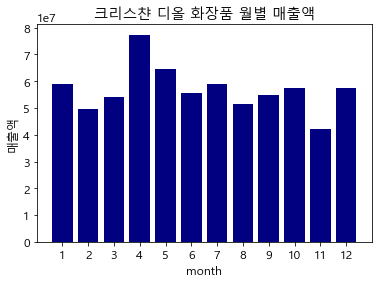

In [31]:
x = b.index
y = b['amount']
plt.bar(x,y,color='navy')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("크리스챤 디올 화장품 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [32]:
channel = df1[df1['brand']=='샤넬']
channel

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
108,108,5,2000-11-23 11:30:00,본점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화파트,1,...,서울,5.8,0.0,11:30,Thursday,2000-11-23,11,23,,
439,439,13,2000-11-18 15:53:00,신촌점,4.104840e+12,샤넬,수입종합화장품,화장품,패션잡화,1,...,서울,3.4,0.0,15:53,Saturday,2000-11-18,11,18,,
468,468,13,2001-01-17 16:03:00,신촌점,4.104840e+12,샤넬,수입종합화장품,화장품,패션잡화,1,...,서울,-8.4,0.0,16:03,Wednesday,2001-01-17,1,17,,
577,577,15,2001-03-15 12:43:00,신촌점,4.104840e+12,샤넬,수입종합화장품,화장품,패션잡화,1,...,서울,4.0,0.0,12:43,Thursday,2001-03-15,3,15,,
689,689,18,2001-01-11 15:43:00,신촌점,4.104840e+12,샤넬,수입종합화장품,화장품,패션잡화,1,...,서울,-8.0,0.2,15:43,Thursday,2001-01-11,1,11,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048212,1048212,30345,2001-04-10 18:43:00,천호점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화,1,...,서울,17.9,0.0,18:43,Tuesday,2001-04-10,4,10,,
1048290,1048290,30348,2001-03-13 13:40:00,본점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화파트,1,...,서울,4.9,0.0,13:40,Tuesday,2001-03-13,3,13,,
1048307,1048307,30349,2000-06-10 14:10:00,본점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화파트,1,...,서울,20.3,3.2,14:10,Saturday,2000-06-10,6,10,,
1048527,1048527,30357,2001-01-12 15:23:00,신촌점,4.104840e+12,샤넬,수입종합화장품,화장품,패션잡화,1,...,서울,-10.7,0.0,15:23,Friday,2001-01-12,1,12,,


In [33]:
channel['amount']

108        43000
439        38000
468        90000
577        54000
689        46000
           ...  
1048212    26000
1048290    54000
1048307    98000
1048527    47000
1048561    50000
Name: amount, Length: 10652, dtype: int64

In [34]:
c = channel.groupby('month').sum()
c

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,437337801,12560811,3.468590e+15,845,57656000,3282200,1438,242,91260,-3730.4,1129.0,13622
2,482255012,13854555,3.718985e+15,906,60122000,3383600,1548,274,97848,-169.0,925.7,13464
3,521344781,14976787,4.072001e+15,992,68224000,3822050,1721,310,107136,5003.0,708.1,15766
4,536842890,15426006,4.178727e+15,1018,69368100,3865650,1795,306,109944,13093.3,548.7,13819
5,496639707,14267456,3.874969e+15,944,65713400,3657620,1582,307,101952,16088.0,2470.0,13878
6,491012977,14102864,3.788767e+15,923,62742020,3419150,1629,294,99684,21683.1,1388.2,12385
7,334788422,9619247,2.705090e+15,659,42133000,2343700,1029,236,71172,17612.0,2624.3,9769
8,448283155,12879052,3.460380e+15,843,60143000,3349800,1466,275,91044,21976.1,19180.7,14699
9,436635314,12545425,3.382388e+15,824,56314500,3178080,1408,262,88992,17529.9,5825.4,11555


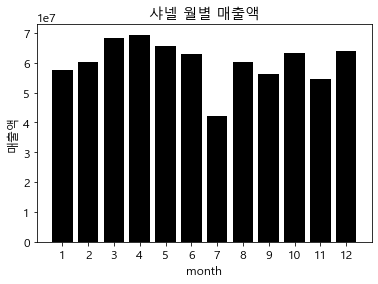

In [35]:
x = c.index
y = c['amount']
plt.bar(x,y,color='black')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("샤넬 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [36]:
amore = df1[df1['brand']=='아모레']
amore

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
207,207,9,2000-07-20 12:20:00,무역점,4.109310e+12,아모레,임대화장품,화장품,명품잡화,0,...,서울,27.9,1.7,12:20,Thursday,2000-07-20,7,20,,
634,634,17,2000-10-29 14:30:00,본점,4.109310e+12,아모레,국내화장품,화장품,잡화파트,0,...,서울,10.4,0.0,14:30,Sunday,2000-10-29,10,29,,
761,761,20,2000-07-05 19:10:00,본점,4.109310e+12,아모레,국내화장품,화장품,잡화파트,0,...,서울,28.4,0.0,19:10,Wednesday,2000-07-05,7,5,,
769,769,20,2000-08-03 13:40:00,본점,4.109310e+12,아모레,국내화장품,화장품,잡화파트,0,...,서울,28.3,0.2,13:40,Thursday,2000-08-03,8,3,,
845,845,20,2000-12-28 14:00:00,본점,4.109310e+12,아모레,국내화장품,화장품,잡화파트,0,...,서울,-2.3,0.0,14:00,Thursday,2000-12-28,12,28,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047915,1047915,30337,2000-07-13 14:03:00,신촌점,4.109310e+12,아모레,국내종합화장품,화장품,패션잡화,0,...,서울,25.9,0.0,14:03,Thursday,2000-07-13,7,13,,
1048089,1048089,30343,2000-11-16 13:13:00,무역점,4.109310e+12,아모레,임대화장품,화장품,명품잡화,0,...,서울,6.1,8.8,13:13,Thursday,2000-11-16,11,16,,
1048153,1048153,30345,2000-08-25 17:43:00,천호점,4.109310e+12,아모레,국산화장품,화장품,잡화,0,...,서울,22.0,122.9,17:43,Friday,2000-08-25,8,25,,
1048173,1048173,30345,2000-11-07 15:03:00,천호점,4.109310e+12,아모레,국산화장품,화장품,잡화,0,...,서울,9.8,0.0,15:03,Tuesday,2000-11-07,11,7,,


In [37]:
amore['amount']

207         27000
634         93000
761         45000
769         44000
845         20000
            ...  
1047915    270000
1048089     92000
1048153     88000
1048173     44000
1048499    148000
Name: amount, Length: 8226, dtype: int64

In [38]:
d = amore.groupby('month').sum()
d

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,387332030,11131198,2.938157e+15,0,72480000,4161960,1441,216,77220,-3533.3,977.2,10203
2,361615851,10390330,2.695707e+15,0,66423400,3887050,1298,186,70848,-474.5,677.7,8975
3,379032316,10887548,2.921719e+15,0,64454500,3676060,1362,221,76788,3418.2,570.8,10287
4,510724296,14672610,3.928500e+15,0,90886000,5115310,1982,277,103248,12687.9,434.3,13007
5,329855983,9474705,2.629958e+15,0,52300500,2949190,1221,215,69120,10955.9,1402.0,8580
6,340901050,9791404,2.650505e+15,0,48935500,2798250,1201,203,69660,15148.2,1048.8,8542
7,306356298,8800645,2.440930e+15,0,44773000,2567750,1147,192,64152,15902.6,2303.8,8927
8,230675404,6625386,1.882064e+15,0,41862000,2342600,902,146,49464,11963.9,11411.0,8718
9,329860563,9477877,2.494351e+15,0,47680500,2657490,1154,182,65556,13065.6,3444.2,8248


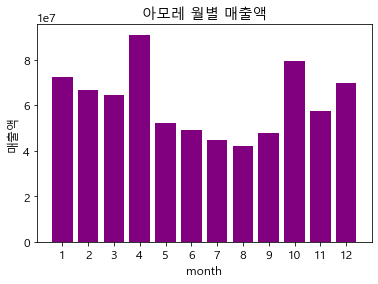

In [39]:
x = d.index
y = d['amount']
plt.bar(x,y,color='purple')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("아모레 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [40]:
giordano = df1[df1['brand']=='지오다노']
giordano

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
58,58,3,2000-08-27 11:13:00,천호점,4.405620e+12,지오다노,영캐쥬얼,영트랜디,영라이브,0,...,서울,25.0,26.1,11:13,Sunday,2000-08-27,8,27,,
59,59,3,2000-08-27 11:33:00,천호점,4.405620e+12,지오다노,영캐쥬얼,영트랜디,영라이브,0,...,서울,25.0,26.1,11:33,Sunday,2000-08-27,8,27,,
60,60,3,2000-08-27 11:43:00,천호점,4.405620e+12,지오다노,영캐쥬얼,영트랜디,영라이브,0,...,서울,25.0,26.1,11:43,Sunday,2000-08-27,8,27,,
103,103,5,2000-10-12 17:00:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,10.6,0.0,17:00,Thursday,2000-10-12,10,12,,
199,199,9,2000-05-22 18:33:00,무역점,4.405620e+12,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,...,서울,20.2,0.0,18:33,Monday,2000-05-22,5,22,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048487,1048487,30355,2001-01-14 17:10:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,-15.3,0.0,17:10,Sunday,2001-01-14,1,14,,1 Diary Day
1048496,1048496,30355,2001-03-25 14:40:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,9.9,0.0,14:40,Sunday,2001-03-25,3,25,,
1048500,1048500,30355,2001-04-07 18:00:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,13.6,0.0,18:00,Saturday,2001-04-07,4,7,,
1048517,1048517,30356,2000-08-14 17:03:00,천호점,4.405620e+12,지오다노,영캐쥬얼,영트랜디,영라이브,0,...,서울,28.1,0.0,17:03,Monday,2000-08-14,8,14,,8 Green Day


In [41]:
e = giordano.groupby('month').sum()
e

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,605897942,17409182,5.104298e+15,0,47363100,2336560,1755,406,119988,-5786.9,1858.7,15867
2,637210657,18305119,5.610519e+15,0,59258300,3255010,1998,423,133164,-160.8,1809.1,19593
3,823721567,23665946,7.079552e+15,0,70781700,3907280,2421,532,167508,8775.0,1252.4,24877
4,1015857114,29182915,8.771997e+15,0,82556600,4496890,2881,681,209628,25520.8,993.6,27254
5,809836243,23262913,6.899201e+15,0,62172300,3378750,2234,598,169128,27147.0,4476.3,24658
6,912638254,26222173,7.555638e+15,0,57517300,3146710,2213,709,185220,40574.3,3243.0,24299
7,1043973260,30003879,8.405923e+15,0,62429200,3098110,2477,745,206064,50927.3,8189.3,28297
8,517867899,14881567,4.330724e+15,0,41752000,2230860,1434,320,106164,25546.4,23036.9,16791
9,705319016,20264710,5.837446e+15,0,56625400,3160020,2004,493,143100,27845.2,8719.2,19493


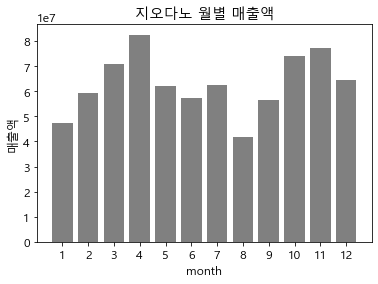

In [42]:
x = e.index
y = e['amount']
plt.bar(x,y,color='grey')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("지오다노 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [43]:
burberry = df1[df1['brand']=='버버리']
burberry

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
670,670,18,2000-11-16 16:10:00,무역점,4.100830e+12,버버리,명품,수입명품,명품잡화,1,...,서울,6.1,8.8,16:10,Thursday,2000-11-16,11,16,,
735,735,20,2000-05-07 16:30:00,본점,4.100830e+12,버버리,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,서울,14.7,0.0,16:30,Sunday,2000-05-07,5,7,,
736,736,20,2000-05-11 15:30:00,본점,4.100830e+12,버버리,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,서울,11.7,7.6,15:30,Thursday,2000-05-11,5,11,,
1120,1120,26,2000-10-12 16:23:00,천호점,4.100830e+12,버버리,엘레강스부틱,로얄부틱,로얄부틱,1,...,서울,10.6,0.0,16:23,Thursday,2000-10-12,10,12,,
2354,2354,61,2000-10-24 17:23:00,무역점,4.100830e+12,버버리,명품,수입명품,명품잡화,1,...,서울,14.9,11.8,17:23,Tuesday,2000-10-24,10,24,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047364,1047364,30322,2000-11-04 11:20:00,본점,4.100830e+12,버버리,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,서울,13.5,0.0,11:20,Saturday,2000-11-04,11,4,,
1047365,1047365,30322,2000-11-04 11:20:00,본점,4.100830e+12,버버리,수입부띠끄,로얄부띠끄,로얄부띠끄,1,...,서울,13.5,0.0,11:20,Saturday,2000-11-04,11,4,,
1047407,1047407,30326,2000-10-28 13:43:00,무역점,4.100830e+12,버버리,명품,수입명품,명품잡화,1,...,서울,12.2,0.0,13:43,Saturday,2000-10-28,10,28,,
1048221,1048221,30346,2000-12-05 15:33:00,무역점,4.100830e+12,버버리,명품,수입명품,명품잡화,1,...,서울,1.4,0.0,15:33,Tuesday,2000-12-05,12,5,,


In [44]:
f = burberry.groupby('month').sum()
f

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,114838939,3298825,8.324685e+14,203,74906500,3342850,580,92,21924,-1141.3,211.6,2466
2,57878853,1661537,4.592930e+14,112,48578000,3001250,325,51,12096,-24.2,95.3,1671
3,79968626,2296107,6.397295e+14,156,69618000,4237750,477,65,16848,732.8,54.7,2064
4,99396008,2856380,7.176452e+14,175,47054000,2940250,452,70,18900,2222.1,79.2,2438
5,107145873,3078890,8.078635e+14,197,41018000,2263150,562,72,21276,3406.7,639.7,2847
6,65784941,1888611,5.454104e+14,133,25190000,1337500,356,45,14364,3094.7,73.5,1479
7,103331032,2970208,7.586536e+14,185,34977000,1050560,531,68,19980,4916.2,1066.2,2488
8,48451861,1393927,3.362681e+14,82,27722000,1851100,210,40,8856,2104.1,2442.9,1502
9,70384516,2022219,5.987212e+14,146,56114000,3824450,476,65,15768,3122.3,1212.5,1817


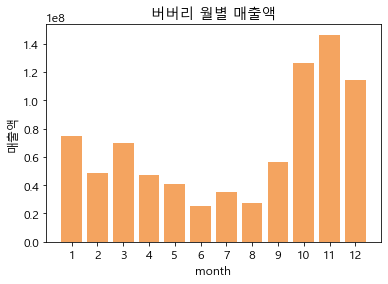

In [45]:
x = f.index
y = f['amount']
plt.bar(x,y,color='sandybrown')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("버버리 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [46]:
time = df1[df1['brand']=='타임']
time

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
137,137,6,2000-11-11 14:30:00,본점,4.208890e+12,타임,하이캐쥬얼,여성캐주얼,여성의류파트,0,...,서울,1.9,0.0,14:30,Saturday,2000-11-11,11,11,,11 Ppapparo Day
917,917,22,2000-10-02 14:20:00,본점,4.208890e+12,타임,하이캐쥬얼,여성캐주얼,여성의류파트,0,...,서울,19.4,0.4,14:20,Monday,2000-10-02,10,2,,
919,919,22,2000-10-11 12:40:00,본점,4.208890e+12,타임,하이캐쥬얼,여성캐주얼,여성의류파트,0,...,서울,15.0,2.6,12:40,Wednesday,2000-10-11,10,11,,
923,923,22,2000-11-04 14:50:00,본점,4.208890e+12,타임,하이캐쥬얼,여성캐주얼,여성의류파트,0,...,서울,13.5,0.0,14:50,Saturday,2000-11-04,11,4,,
926,926,22,2001-01-08 15:10:00,본점,4.208890e+12,타임,하이캐쥬얼,여성캐주얼,여성의류파트,0,...,서울,2.0,0.0,15:10,Monday,2001-01-08,1,8,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046137,1046137,30279,2001-01-20 13:03:00,천호점,4.208890e+12,타임,캐릭터,미씨캐릭터,여성캐쥬얼,0,...,서울,0.4,1.2,13:03,Saturday,2001-01-20,1,20,1 pre_eve_new_holiday,
1046174,1046174,30279,2001-04-12 12:43:00,천호점,4.208890e+12,타임,캐릭터,미씨캐릭터,여성캐쥬얼,0,...,서울,9.1,0.0,12:43,Thursday,2001-04-12,4,12,,
1046424,1046424,30289,2001-02-02 13:53:00,천호점,4.208890e+12,타임,캐릭터,미씨캐릭터,여성캐쥬얼,0,...,서울,-4.9,0.1,13:53,Friday,2001-02-02,2,2,,
1047187,1047187,30315,2000-08-12 16:03:00,천호점,4.208890e+12,타임,캐릭터,미씨캐릭터,여성캐쥬얼,0,...,서울,28.6,0.0,16:03,Saturday,2000-08-12,8,12,8 pre_liberation_holiday,


In [47]:
g = time.groupby('month').sum()
g

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,86033941,2469944,6.986757e+14,0,43854000,2503550,477,44,17928,-897.5,119.8,2370
2,108902659,3130703,7.870624e+14,0,49827000,3071900,502,69,20196,-45.3,332.6,3197
3,140525676,4036916,1.127983e+15,0,71404000,4137950,754,89,28944,1499.6,156.2,4252
4,150900458,4333802,1.262667e+15,0,69784000,3818550,872,110,32400,3942.3,142.8,3861
5,160281322,4601712,1.321591e+15,0,71503000,4384500,832,117,33912,5490.9,593.8,5069
6,190226889,5464122,1.489947e+15,0,61370000,3618250,965,124,38232,8314.2,506.5,4267
7,121146256,3479632,9.932980e+14,0,41930000,2539550,616,82,25488,6288.7,1174.3,3614
8,127068158,3649971,9.932980e+14,0,55117000,3438200,632,79,25488,6012.5,6950.3,4370
9,158472804,4553990,1.207951e+15,0,70578000,3871600,801,92,30996,6122.2,1546.8,4078


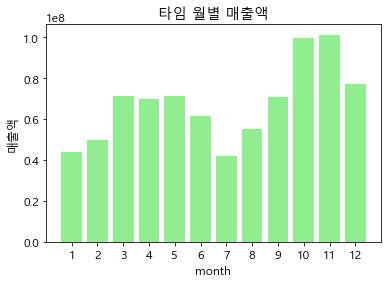

In [48]:
x = g.index
y = g['amount']
plt.bar(x,y,color='lightgreen')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("타임 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [49]:
lancome = df1[df1['brand']=='랑콤']
lancome

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
4,4,0,2000-09-03 18:02:00,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,0,...,서울,25.1,9.5,18:02,Sunday,2000-09-03,9,3,,
10,10,0,2001-04-09 19:30:00,본점,2.139140e+12,랑콤,수입종합화장품,화장품,잡화파트,0,...,서울,20.8,0.0,19:30,Monday,2001-04-09,4,9,,
100,100,5,2000-09-22 11:50:00,본점,2.139140e+12,랑콤,수입종합화장품,화장품,잡화파트,0,...,서울,21.7,0.0,11:50,Friday,2000-09-22,9,22,,
104,104,5,2000-10-12 17:30:00,본점,2.139140e+12,랑콤,수입종합화장품,화장품,잡화파트,0,...,서울,10.6,0.0,17:30,Thursday,2000-10-12,10,12,,
232,232,9,2000-11-06 12:33:00,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,0,...,서울,13.0,0.0,12:33,Monday,2000-11-06,11,6,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048291,1048291,30348,2001-03-13 13:50:00,본점,2.139140e+12,랑콤,수입종합화장품,화장품,잡화파트,0,...,서울,4.9,0.0,13:50,Tuesday,2001-03-13,3,13,,
1048533,1048533,30359,2000-05-07 16:33:00,신촌점,2.139140e+12,랑콤,수입종합화장품,화장품,패션잡화,0,...,서울,14.7,0.0,16:33,Sunday,2000-05-07,5,7,,
1048535,1048535,30359,2000-05-12 14:13:00,신촌점,2.139140e+12,랑콤,수입종합화장품,화장품,패션잡화,0,...,서울,14.2,0.0,14:13,Friday,2000-05-12,5,12,,
1048544,1048544,30359,2000-07-08 17:03:00,신촌점,2.139140e+12,랑콤,수입종합화장품,화장품,패션잡화,0,...,서울,27.0,0.0,17:03,Saturday,2000-07-08,7,8,,


In [50]:
h = lancome.groupby('month').sum()
h

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,540591978,15530472,2.273906e+15,0,94895000,5326250,2164,300,114804,-5262.6,1696.2,15172
2,514068982,14763725,2.222566e+15,0,74937720,4244990,1928,294,112212,-338.2,1528.7,15818
3,623981198,17921396,2.547716e+15,0,84514000,4797550,2066,335,128628,5706.1,1035.6,17754
4,866874363,24903682,3.555251e+15,0,153701000,8632300,3447,420,179496,21378.7,941.7,21503
5,583042966,16755329,3.975889e+15,0,78237000,4392200,1907,356,119448,18862.1,2213.3,15660
6,590567081,16963954,4.228480e+15,0,78367000,4470900,1987,340,123012,26961.0,1564.0,15714
7,546605247,15704937,3.743819e+15,0,78783000,4395250,1927,301,113184,28114.4,3487.5,15586
8,504293225,14490385,2.044879e+15,0,63055300,3476420,1626,276,103140,24885.2,22987.1,16455
9,540256497,15516425,2.214010e+15,0,80772500,4612530,1852,319,111780,22105.2,5961.5,15196


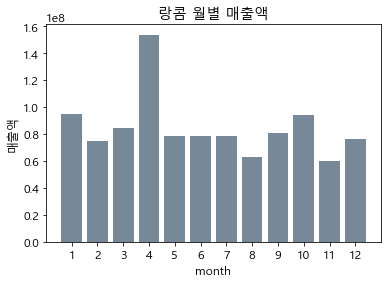

In [51]:
x = h.index
y = h['amount']
plt.bar(x,y,color='lightslategrey')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("랑콤 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [52]:
polo = df1[df1['brand']=='폴로']
polo

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
6,6,0,2000-09-03 19:30:00,무역점,6.315960e+12,폴로,트래디셔널,트래디셔널,골프/유니캐쥬얼,0,...,서울,25.1,9.5,19:30,Sunday,2000-09-03,9,3,,
82,82,5,2000-05-04 18:10:00,본점,6.315970e+12,폴로,트래디셔널,트레디셔널,"케주얼,구두,아동",0,...,서울,18.0,0.0,18:10,Thursday,2000-05-04,5,4,,
83,83,5,2000-05-04 18:20:00,본점,6.315970e+12,폴로,트래디셔널,트레디셔널,"케주얼,구두,아동",0,...,서울,18.0,0.0,18:20,Thursday,2000-05-04,5,4,,
98,98,5,2000-09-18 15:10:00,본점,6.315970e+12,폴로,트래디셔널,트레디셔널,"케주얼,구두,아동",0,...,서울,18.6,0.0,15:10,Monday,2000-09-18,9,18,,
101,101,5,2000-09-24 13:50:00,본점,6.315970e+12,폴로,트래디셔널,트레디셔널,"케주얼,구두,아동",0,...,서울,20.5,0.0,13:50,Sunday,2000-09-24,9,24,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048099,1048099,30344,2000-09-11 15:10:00,신촌점,4.312200e+12,폴로,트레디셔널캐주얼,트래디셔널,스포츠캐주얼,0,...,서울,21.3,0.0,15:10,Monday,2000-09-11,9,11,,
1048217,1048217,30346,2000-07-10 18:30:00,무역점,6.315960e+12,폴로,트래디셔널,트래디셔널,골프/유니캐쥬얼,0,...,서울,28.7,0.0,18:30,Monday,2000-07-10,7,10,,
1048229,1048229,30346,2001-01-21 14:30:00,본점,6.315970e+12,폴로,트래디셔널,트레디셔널,"케주얼,구두,아동",0,...,서울,-1.5,0.0,14:30,Sunday,2001-01-21,1,21,1 pre_happy_new_year_holiday,
1048247,1048247,30346,2001-04-29 15:34:00,무역점,6.315960e+12,폴로,트래디셔널,트래디셔널,골프/유니캐쥬얼,0,...,서울,20.5,0.0,15:34,Sunday,2001-04-29,4,29,,


In [53]:
i = polo.groupby('month').sum()
i

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,516513139,14836827,5.537414e+15,29,116777600,3158610,2486,380,107892,-5356.3,2141.8,12351
2,357293027,10265975,3.892147e+15,3,77826500,4537250,1631,284,74952,-93.9,974.1,10935
3,423075147,12151860,4.649321e+15,14,91094100,5255500,1964,327,90396,4456.5,644.8,12799
4,546021594,15691480,5.660088e+15,13,103164000,6073240,2300,436,109728,13475.2,455.0,14443
5,515749808,14818239,5.478318e+15,17,92193800,5257650,2239,428,104328,16579.1,2742.1,14576
6,471129527,13530170,5.050033e+15,22,83798100,4805200,2167,375,97092,21349.8,1314.0,11543
7,491000859,14106501,5.290840e+15,15,89054300,4726350,2116,414,99900,24595.3,4140.2,15225
8,471826083,13562639,4.657578e+15,14,91425900,5413600,1863,346,89856,21637.3,19148.2,14140
9,553760432,15908061,5.822060e+15,10,131675200,7546300,2593,444,113400,22524.8,6837.7,14186


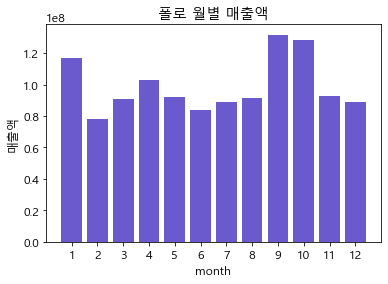

In [54]:
x = i.index
y = i['amount']
plt.bar(x,y,color='slateblue')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("폴로 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [55]:
esteelauder = df1[df1['brand']=='에스티로더']
esteelauder

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
0,0,0,2000-06-25 12:12:00,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:12,Sunday,2000-06-25,6,25,,
201,201,9,2000-06-05 19:23:00,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,1,...,서울,24.6,0.0,19:23,Monday,2000-06-05,6,5,,
258,258,10,2000-05-16 10:30:00,본점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화파트,1,...,서울,16.7,0.6,10:30,Tuesday,2000-05-16,5,16,,
260,260,10,2000-05-31 18:20:00,본점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화파트,1,...,서울,19.9,0.0,18:20,Wednesday,2000-05-31,5,31,,
265,265,10,2000-06-27 10:40:00,본점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화파트,1,...,서울,24.3,21.4,10:40,Tuesday,2000-06-27,6,27,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048514,1048514,30356,2000-08-14 16:23:00,천호점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화,1,...,서울,28.1,0.0,16:23,Monday,2000-08-14,8,14,,8 Green Day
1048515,1048515,30356,2000-08-14 16:43:00,천호점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화,1,...,서울,28.1,0.0,16:43,Monday,2000-08-14,8,14,,8 Green Day
1048516,1048516,30356,2000-08-14 16:50:00,천호점,2.116050e+12,에스티로더,수입종합화장품,화장품,잡화,1,...,서울,28.1,0.0,16:50,Monday,2000-08-14,8,14,,8 Green Day
1048543,1048543,30359,2000-07-08 16:53:00,신촌점,2.116050e+12,에스티로더,수입종합화장품,화장품,패션잡화,1,...,서울,27.0,0.0,16:53,Saturday,2000-07-08,7,8,,


In [56]:
j = polo.groupby('month').sum()
j

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,516513139,14836827,5.537414e+15,29,116777600,3158610,2486,380,107892,-5356.3,2141.8,12351
2,357293027,10265975,3.892147e+15,3,77826500,4537250,1631,284,74952,-93.9,974.1,10935
3,423075147,12151860,4.649321e+15,14,91094100,5255500,1964,327,90396,4456.5,644.8,12799
4,546021594,15691480,5.660088e+15,13,103164000,6073240,2300,436,109728,13475.2,455.0,14443
5,515749808,14818239,5.478318e+15,17,92193800,5257650,2239,428,104328,16579.1,2742.1,14576
6,471129527,13530170,5.050033e+15,22,83798100,4805200,2167,375,97092,21349.8,1314.0,11543
7,491000859,14106501,5.290840e+15,15,89054300,4726350,2116,414,99900,24595.3,4140.2,15225
8,471826083,13562639,4.657578e+15,14,91425900,5413600,1863,346,89856,21637.3,19148.2,14140
9,553760432,15908061,5.822060e+15,10,131675200,7546300,2593,444,113400,22524.8,6837.7,14186


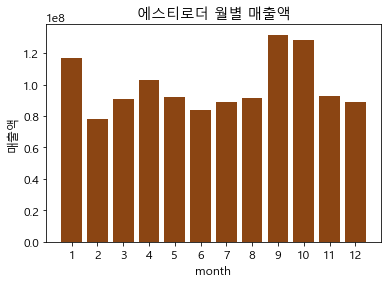

In [57]:
x = j.index
y = j['amount']
plt.bar(x,y,color='saddlebrown')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("에스티로더 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [58]:
sisley = df1[df1['brand']=='시슬리']
sisley

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
1,1,0,2000-06-25 12:42:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:42,Sunday,2000-06-25,6,25,,
19,19,1,2000-06-21 15:30:00,본점,4.229810e+12,시슬리,영트랜드,영트렌디,"케주얼,구두,아동",0,...,서울,26.0,0.0,15:30,Wednesday,2000-06-21,6,21,,
20,20,1,2000-06-30 11:20:00,본점,4.229810e+12,시슬리,영트랜드,영트렌디,"케주얼,구두,아동",0,...,서울,23.0,3.7,11:20,Friday,2000-06-30,6,30,,
21,21,1,2000-06-30 11:20:00,본점,4.229810e+12,시슬리,영트랜드,영트렌디,"케주얼,구두,아동",0,...,서울,23.0,3.7,11:20,Friday,2000-06-30,6,30,,
78,78,4,2000-07-27 14:03:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,28.3,0.0,14:03,Thursday,2000-07-27,7,27,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047781,1047781,30334,2000-08-06 16:13:00,신촌점,4.125440e+12,시슬리,수입종합화장품,화장품,패션잡화,1,...,서울,24.4,7.9,16:13,Sunday,2000-08-06,8,6,,
1048003,1048003,30340,2000-06-30 12:33:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,23.0,3.7,12:33,Friday,2000-06-30,6,30,,
1048222,1048222,30346,2000-12-05 15:43:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,1.4,0.0,15:43,Tuesday,2000-12-05,12,5,,
1048249,1048249,30347,2001-04-19 17:20:00,본점,4.125440e+12,시슬리,수입종합화장품,화장품,잡화파트,1,...,서울,13.2,0.0,17:20,Thursday,2001-04-19,4,19,,


In [61]:
k = sisley.groupby('month').sum()
k

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),day
month,,,,,,,,,,,,
1,330565514,9500477,2.565322e+15,469,120189500,6204950,1551,204,66744,-3044.5,862.1,8639
2,326054420,9368216,2.541697e+15,451,104935200,6219050,1576,222,66096,-152.9,776.7,9048
3,369183953,10601527,2.977272e+15,535,133600000,7604400,1868,245,77436,3390.3,638.0,10646
4,441481064,12681759,3.521800e+15,627,144323500,8195320,2203,328,91584,11112.1,437.2,11218
5,313406681,9004098,2.518073e+15,433,111054420,6171650,1505,216,65448,10426.9,1457.6,8864
6,412730659,11856102,3.177879e+15,555,125480900,6807250,1924,298,82620,18011.5,1417.7,10660
7,307135979,8822381,2.564073e+15,357,89502400,4673870,1463,226,66420,16502.7,2101.3,8955
8,241693655,6947016,1.937748e+15,360,79879600,4560700,1122,166,50436,12216.4,11210.7,7939
9,367727993,10566681,2.849563e+15,418,108677000,5651850,1727,247,73872,14729.8,2760.2,10732


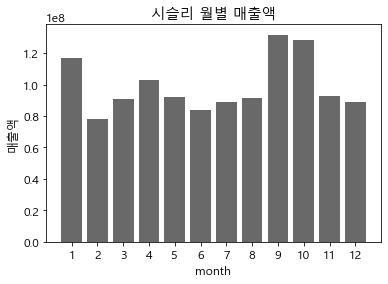

In [63]:
x = j.index
y = j['amount']
plt.bar(x,y,color='dimgrey')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("시슬리 월별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [ ]:
#df1['low'] = df1.apply(lambda df1: event_day(df1['month'],df1['day']),axis=1)

### 하위 10 브랜드별 매출액

In [64]:
low = df1.groupby('brand')['amount'].sum().nsmallest(20)
low

brand
코디하임        -764300
M  파죠티      -328000
난다          -169600
스톰          -118300
판타지아        -118000
베리                0
에스퍼               0
오더메이드             0
이브                0
장수촌옥돌             0
쟈니람스수입행사          0
레카타클럽         10000
지나쏠레(레포츠)     10000
홍앤드이          11000
아산유통          12000
세페            14000
티앤비           15000
올해오래          16000
삼성그리팅카드       16900
캐릭터저금통        17000
Name: amount, dtype: int64

In [65]:
index_low = df1[df1['amount']<0].index

In [66]:
df1_drop_low = df1.drop(index_low)
#df1_drop_low
#df1_drop_low[df1_drop_low['amount']==0].index
df1_drop_lowest = df1_drop_low.groupby('brand')['amount'].sum().nsmallest(10)
df1_drop_lowest

brand
에스퍼           7000
레카타클럽        10000
베리           10000
지나쏠레(레포츠)    10000
홍앤드이         11000
아산유통         12000
세페           14000
티앤비          15000
올해오래         16000
삼성그리팅카드      16900
Name: amount, dtype: int64

In [67]:
a12 = df1_drop_low.groupby('brand')['amount'].sum().nsmallest(10)
a12

brand
에스퍼           7000
레카타클럽        10000
베리           10000
지나쏠레(레포츠)    10000
홍앤드이         11000
아산유통         12000
세페           14000
티앤비          15000
올해오래         16000
삼성그리팅카드      16900
Name: amount, dtype: int64

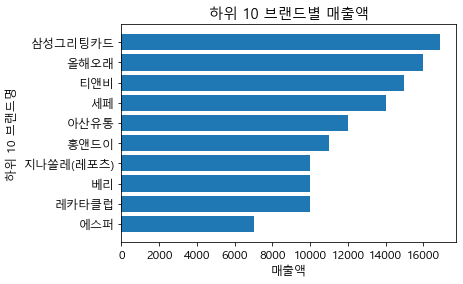

In [68]:
x = a12[:]
y = a12.index
plt.barh(y,x)
plt.ylabel("하위 10 브랜드명")
plt.xlabel("매출액")
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("하위 10 브랜드별 매출액")
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

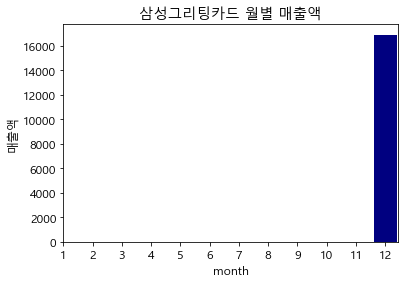

In [69]:
samsung = df1[df1['brand']=='삼성그리팅카드']
samsung

samsung['amount']

k = samsung.groupby('month').sum()
k

x = k.index
y = k['amount']
plt.bar(x,y,color='navy')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("삼성그리팅카드 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

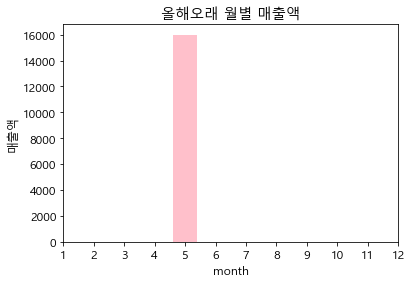

In [70]:
ohrae = df1[df1['brand']=='올해오래']
ohrae

l = ohrae.groupby('month').sum()
l

x = l.index
y = l['amount']
plt.bar(x,y,color='pink')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("올해오래 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

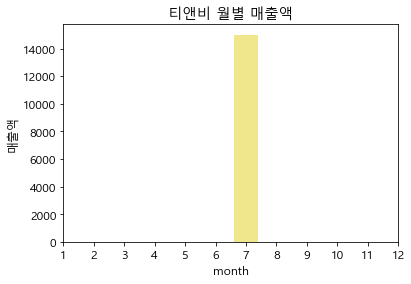

In [71]:
tnb = df1[df1['brand']=='티앤비']
tnb

m = tnb.groupby('month').sum()
m

x = m.index
y = m['amount']
plt.bar(x,y,color='khaki')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("티앤비 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

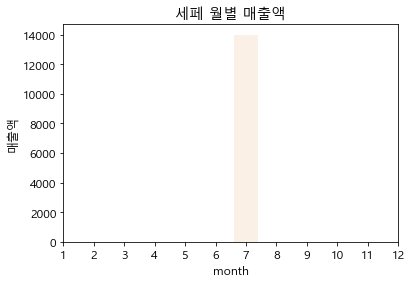

In [72]:
sapae = df1[df1['brand']=='세페']
n = sapae.groupby('month').sum()

x = n.index
y = n['amount']
plt.bar(x,y,color='linen')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("세페 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

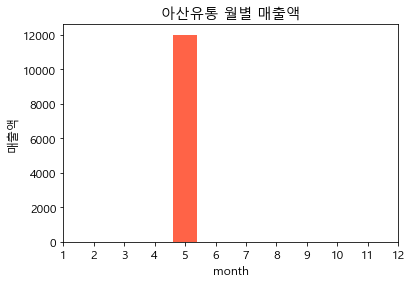

In [73]:
asan = df1[df1['brand']=='아산유통']
o = asan.groupby('month').sum()

x = o.index
y = o['amount']
plt.bar(x,y,color='tomato')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("아산유통 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

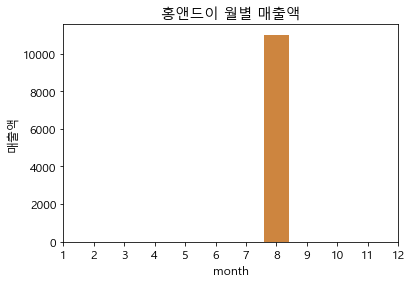

In [74]:
hong = df1[df1['brand']=='홍앤드이']
p = hong.groupby('month').sum()

x = p.index
y = p['amount']
plt.bar(x,y,color='peru')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("홍앤드이 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

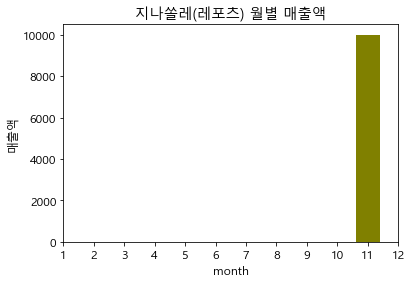

In [75]:
gina = df1[df1['brand']=='지나쏠레(레포츠)']
q = gina.groupby('month').sum()

x = q.index
y = q['amount']
plt.bar(x,y,color='olive')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("지나쏠레(레포츠) 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


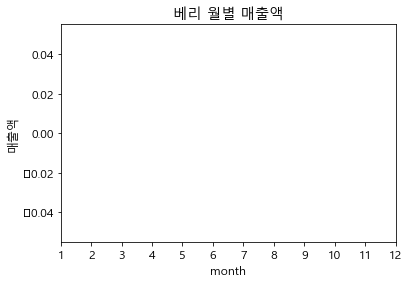

In [76]:
berry = df1[df1['brand']=='베리']
r = berry.groupby('month').sum()

x = r.index
y = r['amount']
plt.bar(x,y,color='coral')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("베리 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

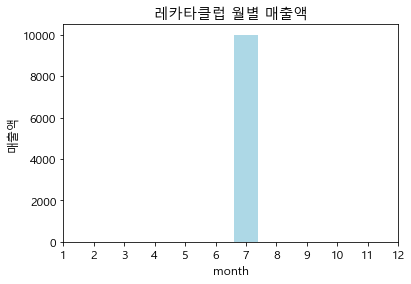

In [77]:
lecata = df1[df1['brand']=='레카타클럽']
s = lecata.groupby('month').sum()

x = s.index
y = s['amount']
plt.bar(x,y,color='lightblue')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("레카타클럽 월별 매출액")
#plt.bar(x,y,colors='green')
# plt.show()
# plt.bar(x, y)
# plt.xticks(x) #띄움
plt.show()

In [ ]:
esper = df1[df1['brand']=='에스퍼']
esper
# w = esper.groupby('month').sum()

# x = w.index
# y = w['amount']
# plt.bar(x,y,color='teal')
# plt.ylabel("매출액")
# plt.xlabel("month")
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
# plt.title("에스퍼 월별 매출액")
# #plt.bar(x,y,colors='green')
# # plt.show()
# # plt.bar(x, y)
# # plt.xticks(x) #띄움
# plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1#['brand'].value_counts()

In [ ]:
df1['brand'].value_counts()

In [78]:
# pc컬럼 중에 값이 '화장품'인 것만 부르기
cosmetic = df1[df1['pc']=='화장품']
cosmetic

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,fourteenth_day
0,0,0,2000-06-25 12:12:00,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:12,Sunday,2000-06-25,6,25,,
1,1,0,2000-06-25 12:42:00,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,1,...,서울,25.1,0.0,12:42,Sunday,2000-06-25,6,25,,
2,2,0,2000-08-26 18:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,22.1,89.3,18:10,Saturday,2000-08-26,8,26,,
4,4,0,2000-09-03 18:02:00,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,0,...,서울,25.1,9.5,18:02,Sunday,2000-09-03,9,3,,
7,7,0,2000-12-13 19:20:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,-0.2,0.0,19:20,Wednesday,2000-12-13,12,13,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,1048543,30359,2000-07-08 16:53:00,신촌점,2.116050e+12,에스티로더,수입종합화장품,화장품,패션잡화,1,...,서울,27.0,0.0,16:53,Saturday,2000-07-08,7,8,,
1048544,1048544,30359,2000-07-08 17:03:00,신촌점,2.139140e+12,랑콤,수입종합화장품,화장품,패션잡화,0,...,서울,27.0,0.0,17:03,Saturday,2000-07-08,7,8,,
1048545,1048545,30359,2000-07-08 17:13:00,신촌점,2.116050e+12,에스티로더,수입종합화장품,화장품,패션잡화,1,...,서울,27.0,0.0,17:13,Saturday,2000-07-08,7,8,,
1048561,1048561,30359,2000-08-27 14:23:00,신촌점,4.104840e+12,샤넬,수입종합화장품,화장품,패션잡화,1,...,서울,25.0,26.1,14:23,Sunday,2000-08-27,8,27,,


In [79]:
new_cos =cosmetic.groupby('brand')['amount'].sum().nlargest(10)

### 화장품 상위 10 판매량

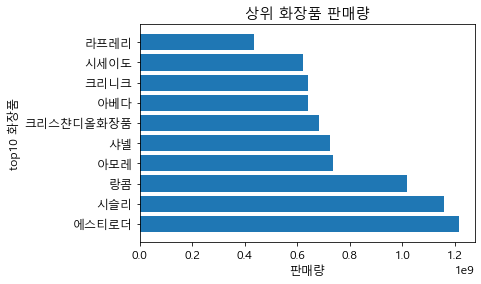

In [80]:
x = new_cos.index
y = new_cos[0:]

# plt.bar(x, y)
# plt.xticks(x) #띄움
# plt.show()
plt.barh(x,y)
plt.ylabel("top10 화장품")
plt.xlabel("판매량")
plt.title("상위 화장품 판매량")
plt.show()

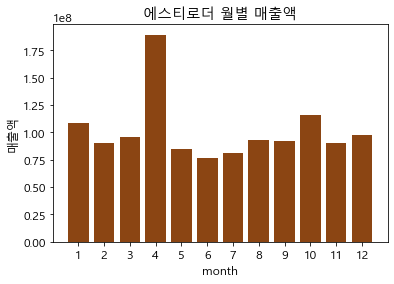

In [81]:
est = df1[df1['brand']=='에스티로더']
t = est.groupby('month').sum()
x = t.index
y = t['amount']
plt.bar(x,y,color='saddlebrown')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("에스티로더 월별 매출액")
plt.show()

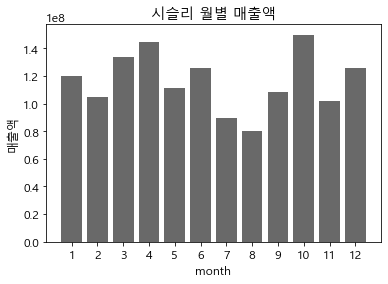

In [82]:
sis = df1[df1['brand']=='시슬리']
u = sis.groupby('month').sum()
x = u.index
y = u['amount']
plt.bar(x,y,color='dimgrey')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("시슬리 월별 매출액")
plt.show()

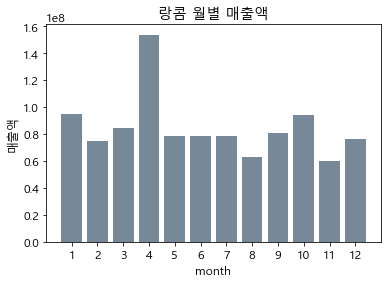

In [83]:
lan = df1[df1['brand']=='랑콤']
v = lan.groupby('month').sum()
x = v.index
y = v['amount']
plt.bar(x,y,color='lightslategrey')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("랑콤 월별 매출액")
plt.show()

In [84]:
amo = df1[df1['brand']=='아모레']
t = amo.groupby('month').sum()
x = w.index
y = w['amount']
plt.bar(x,y,color='purple')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("아모레 월별 매출액")
plt.show()

NameError: name 'w' is not defined

In [ ]:
cha = df1[df1['brand']=='샤넬']
z = cha.groupby('month').sum()
x = z.index
y = z['amount']
plt.bar(x,y,color='black')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("샤넬 월별 매출액")
plt.show()

In [ ]:
abe = df1[df1['brand']=='아베다']
b2 = abe.groupby('month').sum()
x = b2.index
y = b2['amount']
plt.bar(x,y,color='indigo')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("아베다 월별 매출액")
plt.show()

In [ ]:
cri = df1[df1['brand']=='크리니크']
c2 = cri.groupby('month').sum()
x = c2.index
y = c2['amount']
plt.bar(x,y,color='aquamarine')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("크리니크 월별 매출액")
plt.show()

In [ ]:
sish = df1[df1['brand']=='시세이도']
d2 = sish.groupby('month').sum()
x = d2.index
y = t['amount']
plt.bar(x,y,color='sienna')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("시세이도 월별 매출액")
plt.show()

In [ ]:
lap = df1[df1['brand']=='라프레리']
e2 = lap.groupby('month').sum()
x = e2.index
y = e2['amount']
plt.bar(x,y,color='y')
plt.ylabel("매출액")
plt.xlabel("month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("라프레리 월별 매출액")
plt.show()

### 공휴일별 매출액

In [32]:
def holiday(x):
    if x == '2000-05-05':
        return '5 children_holiday'
    elif x == '2000-05-08':
        return '5 parents_holiday'
    elif x == '2000-05-11':
        return '5 buddha_holiday'
    elif x == '2000-06-06':
        return '6 memorial_holiday'
    elif x == '2000-07-17':
        return '7 constitution_holiday'
    elif x == '2000-08-15':
        return '8 liberation_holiday'
    elif x == '2000-09-11':
        return '9 eve_thanksgiving_holiday'
    elif x == '2000-09-12':
        return '9 thanksgiving_holiday'
    elif x == '2000-09-13':
        return '9 thanksgiving_2_holiday'
    elif x == '2000-10-03':
        return '10 national_foundation_holiday'
    elif x == '2000-12-25':
        return '12 christmas_holiday'
    elif x == '2001-01-01':
        return '1 new_year_holiday'
    elif x == '2001-01-23':
        return '1 eve_new_holiday'
    elif x == '2001-01-24':
        return '1 happy_new_year_holiday'
    elif x == '2001-01-25':
        return '1 new_year_2_holiday'
    elif x == '2001-03-01':
        return '3 independence_holiday'
    elif x == '2001-04-05':
        return '4 arbor_holiday'
    else :
        return ' '

In [25]:
def holiday(x):
    if x == '2000-05-05':
        return '5월 어린이날'
    elif x == '2000-05-08':
        return '5월 어버이날'
    elif x == '2000-05-11':
        return '5월 석가탄신일'
    elif x == '2000-06-06':
        return '6월 현충일'
    elif x == '2000-07-17':
        return '7월 제헌절'
    elif x == '2000-08-15':
        return '8월 광복절'
    elif x == '2000-09-11':
        return '9월 추석연휴(전날)'
    elif x == '2000-09-12':
        return '9월 추석'
    elif x == '2000-09-13':
        return '9월 추석연휴(다음날)'
    elif x == '2000-10-03':
        return '10월 개천절'
    elif x == '2000-12-25':
        return '12월 크리스마스'
    elif x == '2001-01-01':
        return '1월 신정'
    elif x == '2001-01-23':
        return '1월 설날 연휴(전날)'
    elif x == '2001-01-24':
        return '1월 설날'
    elif x == '2001-01-25':
        return '1월 설날 연휴(다음날)'
    elif x == '2001-03-01':
        return '3월 삼일절'
    elif x == '2001-04-05':
        return '4월 식목일'
    else :
        return ' '

In [33]:
df1['holiday'] = df1.apply(lambda df1 : holiday(df1['date']),axis=1)

In [ ]:
# 2000 휴일 : 5/5,5/11,6/6,7/17,8/15,9/11,9/12,9/13,10/3,12/25
# 2001 휴일 : 1/1,1/23,1/24,1/25,3/1,4/5

In [34]:
index_holiday = df1[df1['holiday']==' '].index

#df1의 index_14 삭제하기 >> df1_14에 저장
holiday_drop= df1.drop(index_holiday)

holiday_drop

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,holiday
65,65,3,2000-12-25 13:23:00,무역점,4.234960e+12,휠라인티모,란제리,란제리,명품잡화,0,...,서울,-6.4,0.6,13:23,Monday,2000-12-25,12,25,,12 christmas_holiday
66,66,3,2000-12-25 13:40:00,무역점,4.309140e+12,피에르가르뎅,셔츠,셔츠,남성의류,0,...,서울,-6.4,0.6,13:40,Monday,2000-12-25,12,25,,12 christmas_holiday
67,67,3,2000-12-25 14:13:00,무역점,4.556360e+12,바디클럽,욕실용품,식기,가정용품,0,...,서울,-6.4,0.6,14:13,Monday,2000-12-25,12,25,,12 christmas_holiday
68,68,3,2000-12-25 14:43:00,무역점,2.139140e+12,폴로화장품,수입종합화장품,화장품,명품잡화,0,...,서울,-6.4,0.6,14:43,Monday,2000-12-25,12,25,,12 christmas_holiday
90,90,5,2000-07-17 16:10:00,본점,4.408220e+12,아레나,수영복,스포츠,남성정장스포츠,0,...,서울,27.0,0.0,16:10,Monday,2000-07-17,7,17,,7 constitution_holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048465,1048465,30355,2000-06-06 18:50:00,본점,2.700000e+12,식품,용기보증,미확인pc,공산품파트,0,...,서울,22.3,0.0,18:50,Tuesday,2000-06-06,6,6,,6 memorial_holiday
1048466,1048466,30355,2000-06-06 19:33:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,22.3,0.0,19:33,Tuesday,2000-06-06,6,6,,6 memorial_holiday
1048475,1048475,30355,2000-07-17 17:03:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,27.0,0.0,17:03,Monday,2000-07-17,7,17,,7 constitution_holiday
1048498,1048498,30355,2001-04-05 18:40:00,본점,2.116050e+12,바비브라운,수입종합화장품,화장품,잡화파트,0,...,서울,9.4,0.0,18:40,Thursday,2001-04-05,4,5,,4 arbor_holiday


In [35]:
holiday_group = holiday_drop.groupby(holiday_drop['holiday']).sum()
holiday_group
#aa=df1[df1['holiday']=="holiday"]

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
holiday,,,,,,,,,,,,,
1 eve_new_holiday,1057786467,30382891,7.305540e+15,226,163047202,4522490,3311,765,217080,-5628.0,0.0,2010,46230
10 national_foundation_holiday,2179379002,62605346,1.654012e+16,488,448739939,13369430,8107,1530,447120,73278.0,0.0,41400,12420
12 christmas_holiday,1322849330,37998762,1.002196e+16,337,282224328,10024220,4635,1021,272916,-16172.8,1516.2,30324,63175
3 independence_holiday,1989656447,57155827,1.556350e+16,516,468489663,19277800,7701,1385,418716,18997.3,0.0,11631,3877
4 arbor_holiday,3835509900,110187042,2.923127e+16,983,844036963,21468370,15425,2530,792396,68967.8,0.0,29348,36685
5 buddha_holiday,1695377436,48716723,1.281893e+16,516,371893902,14747880,5936,1225,343440,37206.0,24168.0,15900,34980
5 children_holiday,1792001572,51481082,1.395635e+16,484,355332666,14466590,6121,1218,366876,57409.3,6114.6,16985,16985
5 parents_holiday,1471011110,42259384,1.107759e+16,433,234668956,9868450,5189,998,303156,47719.0,0.0,14035,22456
6 memorial_holiday,2418108827,69483312,1.839880e+16,692,501663427,16562300,8520,1759,486000,100350.0,0.0,27000,27000


In [ ]:
aa

In [ ]:
# df1_holiday = df1.groupby('holiday').sum()
# df1_holiday

In [36]:
holiday_amount=holiday_group['amount']
holiday_amount

holiday
1 eve_new_holiday                 163047202
10 national_foundation_holiday    448739939
12 christmas_holiday              282224328
3 independence_holiday            468489663
4 arbor_holiday                   844036963
5 buddha_holiday                  371893902
5 children_holiday                355332666
5 parents_holiday                 234668956
6 memorial_holiday                501663427
7 constitution_holiday            305858773
8 liberation_holiday              194983587
9 eve_thanksgiving_holiday        187294689
Name: amount, dtype: int64

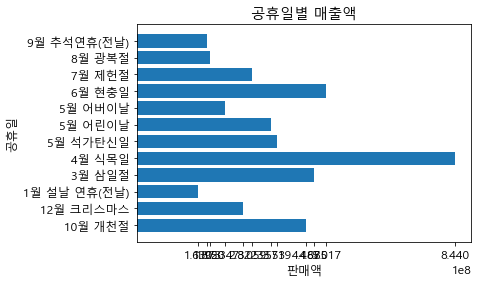

In [147]:
x = holiday_amount
y = holiday_group.index
plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.barh(y,x)
plt.xticks(x) #띄움
plt.xlabel("판매액")
plt.ylabel("공휴일")
plt.title("공휴일별 매출액")

plt.show()

C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\687\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.

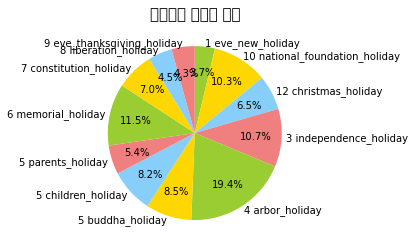

In [37]:
labels = holiday_group.index
ratio = holiday_amount

plt.pie(holiday_amount,labels=holiday_group.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

### 휴일 3일전 매출 파악

In [ ]:
df1

### 8. 공휴일에 store 매출액 비교 

In [39]:
store_sum = df1.groupby('store').sum()
store_sum

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
store,,,,,,,,,,,,,
무역점,151115881625,4341325418,1.128853e+18,41021,30187906148,1075805490,536169,103871,31088124,3804608.0,917601.4,1872419,4228949
본점,157544616491,4525419128,1.175403e+18,56671,35291176374,1196749750,558407,135230,32708880,4011130.2,989682.3,1988111,4435546
신촌점,133003832134,3820786784,9.868685e+17,23665,20259811415,679498580,469748,72856,27281664,3274314.2,840612.4,1649933,3732419
천호점,108089910775,3105268989,8.124081e+17,20121,17524033763,546914430,396296,69996,22167432,2691981.3,676642.2,1339273,3000751


In [40]:
store_sum['amount']

store
무역점    30187906148
본점     35291176374
신촌점    20259811415
천호점    17524033763
Name: amount, dtype: int64

In [41]:
holiday_group.index

Index(['1 eve_new_holiday', '10 national_foundation_holiday',
       '12 christmas_holiday', '3 independence_holiday', '4 arbor_holiday',
       '5 buddha_holiday', '5 children_holiday', '5 parents_holiday',
       '6 memorial_holiday', '7 constitution_holiday', '8 liberation_holiday',
       '9 eve_thanksgiving_holiday'],
      dtype='object', name='holiday')

In [42]:
sinchon_store = df1[df1['store']=='신촌점']
sinchon_store

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,holiday
85,85,5,2000-06-29 19:02:00,신촌점,4.409230e+12,팅클,유아,아동,아동문화,0,...,서울,23.3,21.5,19:02,Thursday,2000-06-29,6,29,,
86,86,5,2000-06-29 19:12:00,신촌점,4.400200e+12,쇼콜라,미확인코너,아동,아동문화,0,...,서울,23.3,21.5,19:12,Thursday,2000-06-29,6,29,,
87,87,5,2000-07-07 19:00:00,신촌점,4.400040e+12,모다까리나,아동,아동,아동문화,0,...,서울,27.8,0.0,19:00,Friday,2000-07-07,7,7,,
88,88,5,2000-07-07 19:10:00,신촌점,4.400040e+12,모다까리나,아동,아동,아동문화,0,...,서울,27.8,0.0,19:10,Friday,2000-07-07,7,7,,
123,123,6,2000-08-12 18:42:00,신촌점,4.405550e+12,톰키드,아동,아동,아동문화,0,...,서울,28.6,0.0,18:42,Saturday,2000-08-12,8,12,8월 광복절 3일전,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,1048567,30359,2001-01-05 17:00:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,공산품,0,...,서울,-6.8,0.0,17:00,Friday,2001-01-05,1,5,,
1048568,1048568,30359,2001-02-07 18:43:00,신촌점,4.200350e+12,비너스,란제리,타운란제리,여성캐주얼,0,...,서울,-2.6,0.0,18:43,Wednesday,2001-02-07,2,7,,
1048569,1048569,30359,2001-02-07 19:13:00,신촌점,2.139140e+12,랑콤,수입종합화장품,화장품,패션잡화,0,...,서울,-2.6,0.0,19:13,Wednesday,2001-02-07,2,7,,
1048570,1048570,30359,2001-02-07 19:20:00,신촌점,2.700000e+12,식품,용기보증,미확인pc,생식품,0,...,서울,-2.6,0.0,19:20,Wednesday,2001-02-07,2,7,,


In [43]:
d233 = sinchon_store[sinchon_store['holiday']==' '].index
#df1의 index_14 삭제하기 >> df1_14에 저장
sin_ho= sinchon_store.drop(d233)
#sin_ho

sinchon_store_holi = sin_ho.groupby('holiday').sum()
sinchon_store_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
holiday,,,,,,,,,,,,,
1 eve_new_holiday,248704728,7142540,1.644743e+15,50,30649017,858500,764,147,49680,-1288.0,0.0,460,10580
10 national_foundation_holiday,625938583,17977584,4.870752e+15,112,95943633,2758110,2333,358,130140,21328.5,0.0,12050,3615
12 christmas_holiday,315450625,9063463,2.459996e+15,65,48054354,1647220,1127,190,66636,-3948.8,370.2,7404,15425
3 independence_holiday,435771909,12523363,3.280373e+15,77,76182712,3593130,1651,209,88020,3993.5,0.0,2445,815
4 arbor_holiday,885209984,25438431,6.520141e+15,175,156372478,3872440,3345,492,177336,15434.8,0.0,6568,8210
5 buddha_holiday,378594933,10876309,2.659927e+15,83,58863051,2972870,1306,221,73332,7944.3,5160.4,3395,7469
5 children_holiday,445183637,12790247,3.390069e+15,108,61979186,2787900,1452,257,90288,14128.4,1504.8,4180,4180
5 parents_holiday,392064816,11262274,2.851228e+15,80,47968553,2051420,1310,216,79596,12529.0,0.0,3685,5896
6 memorial_holiday,533594804,15335918,3.750674e+15,69,72611403,2770210,1687,289,100872,20828.2,0.0,5604,5604


In [44]:
sinchon_store_holi['amount'].sum()

780787620

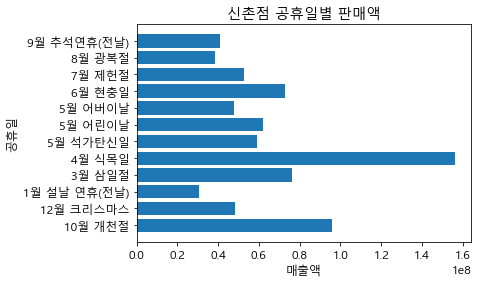

In [151]:
x = sinchon_store_holi['amount']
y =sinchon_store_holi.index
plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.barh(y,x)
#plt.xticks(x) #띄움
plt.xlabel("매출액")
plt.ylabel("공휴일")
plt.title("신촌점 공휴일별 판매액")

plt.show()

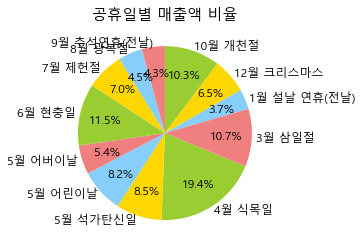

In [153]:
labels = holiday_group.index
ratio = holiday_amount

plt.pie(holiday_amount,labels=holiday_group.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [45]:
origi_store = df1[df1['store']=='본점']
origi_store

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,지점명,평균기온(°C),일강수량(mm),time,week,date,month,day,preparation3_holiday,holiday
2,2,0,2000-08-26 18:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,22.1,89.3,18:10,Saturday,2000-08-26,8,26,,
3,3,0,2000-08-26 18:30:00,본점,4.106430e+12,듀퐁,수입의류,명품토탈,잡화파트,1,...,서울,22.1,89.3,18:30,Saturday,2000-08-26,8,26,,
7,7,0,2000-12-13 19:20:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,-0.2,0.0,19:20,Wednesday,2000-12-13,12,13,,
8,8,0,2000-12-22 19:10:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,5.4,0.0,19:10,Friday,2000-12-22,12,22,12월 크리스마스 3일전,
9,9,0,2000-12-29 19:00:00,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,1,...,서울,-2.2,0.0,19:00,Friday,2000-12-29,12,29,1월 신정 3일전,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048497,1048497,30355,2001-03-25 15:10:00,본점,4.100100e+12,가파치핸드백,핸드백,핸드백,잡화파트,0,...,서울,9.9,0.0,15:10,Sunday,2001-03-25,3,25,,
1048498,1048498,30355,2001-04-05 18:40:00,본점,2.116050e+12,바비브라운,수입종합화장품,화장품,잡화파트,0,...,서울,9.4,0.0,18:40,Thursday,2001-04-05,4,5,,4 arbor_holiday
1048499,1048499,30355,2001-04-05 19:00:00,본점,4.109310e+12,아모레,국내화장품,화장품,잡화파트,0,...,서울,9.4,0.0,19:00,Thursday,2001-04-05,4,5,,4 arbor_holiday
1048500,1048500,30355,2001-04-07 18:00:00,본점,4.405620e+12,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,...,서울,13.6,0.0,18:00,Saturday,2001-04-07,4,7,,


In [46]:
d15 = origi_store[origi_store['holiday']==' '].index
#df1의 index_14 삭제하기 >> df1_14에 저장
ori_ho= origi_store.drop(d15)
ori_ho

origi_store_holi = ori_ho.groupby('holiday').sum()
origi_store_holi

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
holiday,,,,,,,,,,,,,
1 eve_new_holiday,325471785,9349187,2.214825e+15,85,56877366,1512100,933,268,66528,-1724.8,0.0,616,14168
10 national_foundation_holiday,503436735,14462356,3.824867e+15,164,119924507,4066400,1820,436,106056,17381.4,0.0,9820,2946
12 christmas_holiday,432230391,12417281,3.185358e+15,145,125086941,4505110,1502,388,87264,-5171.2,484.8,9696,20200
3 independence_holiday,516673850,14834865,4.230764e+15,200,152829734,5345950,2040,460,113076,5130.3,0.0,3141,1047
4 arbor_holiday,1091348090,31352355,8.303731e+15,383,286583747,7460420,4387,889,227124,19768.2,0.0,8412,10515
5 buddha_holiday,485355061,13943916,3.782812e+15,224,159440783,4806110,1720,415,101736,11021.4,7159.2,4710,10362
5 children_holiday,534574601,15355894,4.181027e+15,178,140378208,5169890,1821,470,109728,17170.4,1828.8,5080,5080
5 parents_holiday,406037855,11662274,3.039058e+15,191,87429393,3645930,1436,324,84024,13226.0,0.0,3890,6224
6 memorial_holiday,727593667,20901867,5.640166e+15,309,178951314,6176350,2763,596,150660,31108.5,0.0,8370,8370


In [47]:
origi_store_holi['amount'].sum()

1546086371

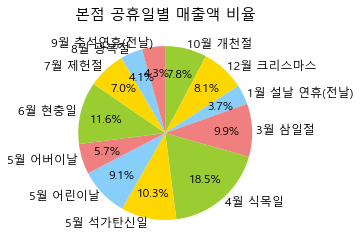

In [156]:
# x = origi_store_holi['amount']
# y =origi_store_holi.index
# plt.rc('font', family='Malgun Gothic', size=12)                                 
# plt.barh(y,x,color='crimson')
# #plt.xticks(x) #띄움
# plt.xlabel("매출액")
# plt.ylabel("공휴일")
# plt.title("본점 공휴일별 판매액")

# plt.show()

labels = origi_store_holi.index
ratio = origi_store_holi['amount']

plt.pie(origi_store_holi['amount'],labels=origi_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="본점 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

In [48]:
chun_store = df1[df1['store']=='천호점']

e15 = chun_store[chun_store['holiday']==' '].index
#df1의 index_14 삭제하기 >> df1_14에 저장
chun_ho= chun_store.drop(e15)
#sin_ho

chun_store_holi = chun_ho.groupby('holiday').sum()
chun_store_holi

# labels = chun_store_holi.index
# ratio = chun_store_holi['amount']

# plt.pie(chun_store_holi['amount'],labels=chun_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
#         startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
# title ="천호점 공휴일별 매출액 비율"
# plt.title(title, size=15)
# plt.show()

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
holiday,,,,,,,,,,,,,
1 eve_new_holiday,213271553,6124665,1.523192e+15,43,28733333,913280,722,137,44820,-1162.0,0.0,415,9545
10 national_foundation_holiday,472904794,13581955,3.585448e+15,90,88884199,2150950,1816,339,96444,15806.1,0.0,8930,2679
12 christmas_holiday,249932166,7177949,1.878274e+15,46,41786197,1439780,923,193,51840,-3072.0,288.0,5760,12000
3 independence_holiday,447823374,12870931,3.294427e+15,91,82647482,3574290,1713,236,88236,4003.3,0.0,2451,817
4 arbor_holiday,836804772,24038438,6.206254e+15,134,154672839,3583090,3437,420,166536,14494.8,0.0,6168,7710
5 buddha_holiday,316966623,9108539,2.365275e+15,78,46220589,1949210,1078,188,63180,6844.5,4446.0,2925,6435
5 children_holiday,287705691,8262435,2.387920e+15,53,49734035,1940540,1079,180,62208,9734.4,1036.8,2880,2880
5 parents_holiday,281350606,8084821,2.157620e+15,52,38396047,1580970,1055,174,56700,8925.0,0.0,2625,4200
6 memorial_holiday,475762398,13673399,3.734536e+15,83,84692024,2540440,1702,316,96984,20025.4,0.0,5388,5388


In [49]:
chun_store_holi['amount'].sum()

727560688

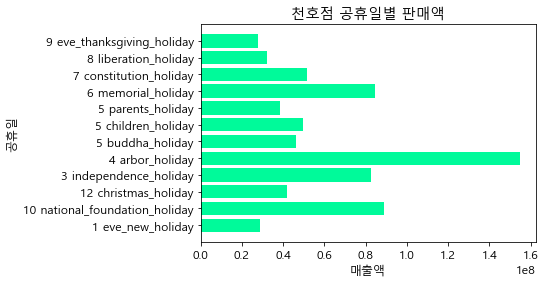

In [102]:
x = chun_store_holi['amount']
y =chun_store_holi.index
plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.barh(y,x,color='mediumspringgreen')
#plt.xticks(x) #띄움
plt.xlabel("매출액")
plt.ylabel("공휴일")
plt.title("천호점 공휴일별 판매액")

plt.show()



In [50]:
mu_store = df1[df1['store']=='무역점']

f15 = mu_store[mu_store['holiday']==' '].index
#df1의 index_14 삭제하기 >> df1_14에 저장
mu_ho= mu_store.drop(f15)
#sin_ho

mu_store_holi = mu_ho.groupby('holiday').sum()
mu_store_holi


# labels = mu_store_holi.index
# ratio = mu_store_holi['amount']

# plt.pie(mu_store_holi['amount'],labels=mu_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
#         startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
# title ="무역점 공휴일별 매출액 비율"
# plt.title(title, size=15)
# plt.show()

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),month,day
holiday,,,,,,,,,,,,,
1 eve_new_holiday,270338401,7766499,1.922780e+15,48,46787486,1238610,892,213,56052,-1453.2,0.0,519,11937
10 national_foundation_holiday,577098890,16583451,4.259055e+15,122,143987600,4393970,2138,397,114480,18762.0,0.0,10600,3180
12 christmas_holiday,325236148,9340069,2.498331e+15,81,67296836,2432110,1083,250,67176,-3980.8,373.2,7464,15550
3 independence_holiday,589387314,16926668,4.757936e+15,148,156829735,6764430,2297,480,129384,5870.2,0.0,3594,1198
4 arbor_holiday,1022147054,29357818,8.201147e+15,291,246407899,6552420,4256,729,221400,19270.0,0.0,8200,10250
5 buddha_holiday,514460819,14787959,4.010916e+15,131,107369479,5019690,1832,401,105192,11395.8,7402.4,4870,10714
5 children_holiday,524537643,15072506,3.997332e+15,145,103241237,4568260,1769,311,104652,16376.1,1744.2,4845,4845
5 parents_holiday,391557833,11250015,3.029689e+15,110,60874963,2590130,1388,284,82836,13039.0,0.0,3835,6136
6 memorial_holiday,681157958,19572128,5.273418e+15,231,165408686,5075300,2368,558,137484,28387.9,0.0,7638,7638


In [51]:
mu_store_holi['amount'].sum()

1303799416

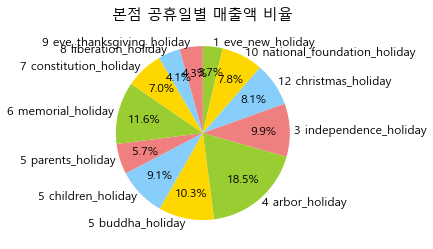

In [130]:
origi_store = df1[df1['store']=='본점']

f1989 = origi_store[origi_store['holiday']==' '].index
#df1의 index_14 삭제하기 >> df1_14에 저장
origi_ho= origi_store.drop(f1989)
#sin_ho

origi_store_holi = origi_ho.groupby('holiday').sum()
origi_store_holi


labels = origi_store_holi.index
ratio = origi_store_holi['amount']

plt.pie(origi_store_holi['amount'],labels=origi_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="본점 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

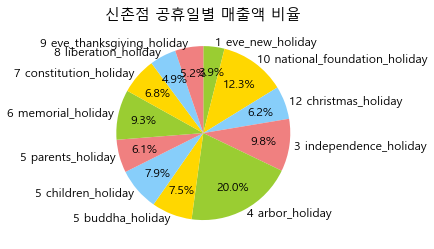

In [131]:
sinchon_store = df1[df1['store']=='신촌점']

f4646 = sinchon_store[sinchon_store['holiday']==' '].index
#df1의 index_14 삭제하기 >> df1_14에 저장
sinchon_ho= sinchon_store.drop(f4646)
#sin_ho

sinchon_store_holi = sinchon_ho.groupby('holiday').sum()
sinchon_store_holi


labels = sinchon_store_holi.index
ratio = sinchon_store_holi['amount']

plt.pie(sinchon_store_holi['amount'],labels=sinchon_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="신촌점 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()

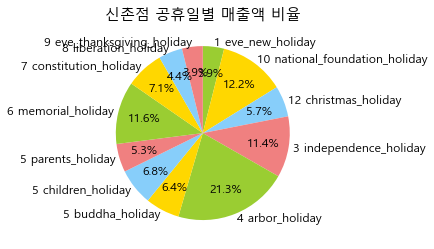

In [111]:
# x = mu_store_holi['amount']
# y =mu_store_holi.index
# plt.rc('font', family='Malgun Gothic', size=12)                                 
# plt.barh(y,x,color='orchid')
# #plt.xticks(x) #띄움
# plt.xlabel("매출액")
# plt.ylabel("공휴일")
# plt.title("무역점 공휴일별 판매액")

# plt.show()

labels = mu_store_holi.index
ratio = mu_store_holi['amount']

plt.pie(mu_store_holi['amount'],labels=mu_store_holi.index,autopct='%.1f%%',colors = ["yellowgreen", 'gold', 'lightskyblue', 'lightcoral'],
        startangle = 90, counterclock=False, pctdistance=0.7, labeldistance=1.05)
title ="신촌점 공휴일별 매출액 비율"
plt.title(title, size=15)
plt.show()


### 수입 판매량 월별 비교

In [ ]:
df1

In [ ]:
importeee = df1[df1['imported']==1]

impo_gro = importeee.groupby('month').sum()
impo_gro

In [ ]:
x =impo_gro.index
y = impo_gro['amount']

plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.bar(x,y,color='cyan')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
#plt.xticks(x) #띄움
plt.xlabel("month")
plt.ylabel("매출액")
plt.title("수입상품 월별 매출액")

plt.show()

In [ ]:
dome = df1[df1['imported']==0]

domes = dome.groupby('month').sum()
domes

In [ ]:
x =domes.index
y = domes['amount']

plt.rc('font', family='Malgun Gothic', size=12)                                 
plt.bar(x,y,color='fuchsia')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
#plt.xticks(x) #띄움
plt.xlabel("month")
plt.ylabel("매출액")
plt.title("국내상품 월별 매출액")

plt.show()